<a href="https://colab.research.google.com/github/ashwith-nagendra/IIITH-AIML/blob/main/AIML_Module_5_Lab_1_Linear_Regression%2C_MSE_and_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn import linear_model,metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
# from sklearn.datasets import load_boston
from sklearn.datasets import fetch_california_housing
import pandas as pd
import seaborn as sns
import math

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
plt.style.use('ggplot')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 8

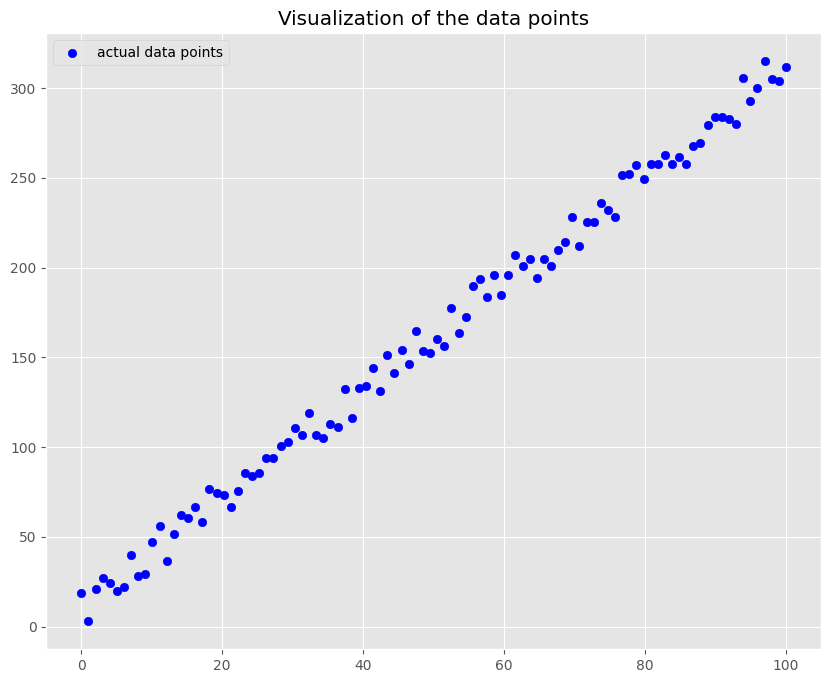

In [2]:
# generating random data points and adding noise

np.random.seed(10)

x = np.linspace(0,100,100).reshape((-1,1))
y = (np.random.rand(100)*25).astype(int).reshape((-1,1)) + 3*x

plt.title("Visualization of the data points")
plt.scatter(x,y,color="blue")
plt.legend(["actual data points"])
plt.show()

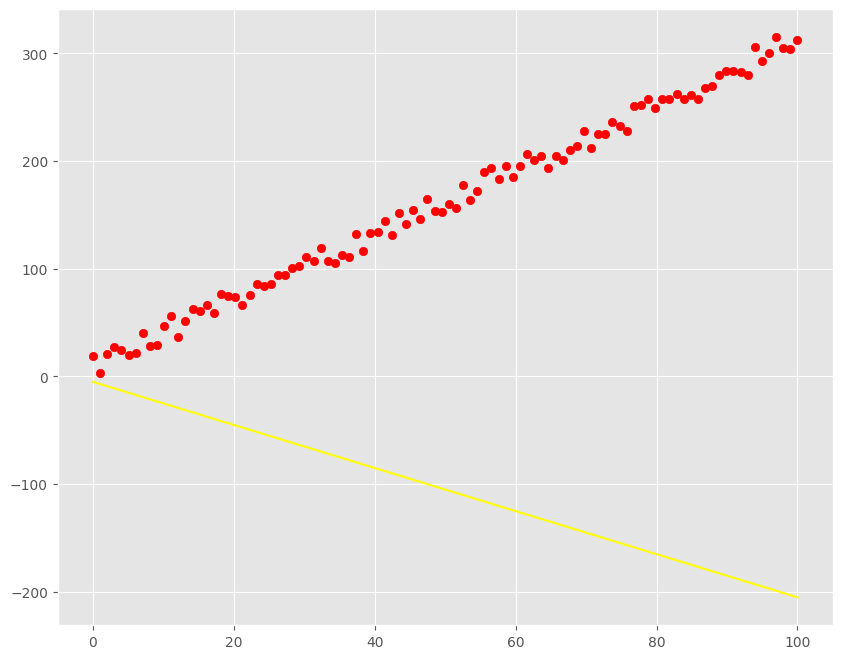

Average distance: 266.59



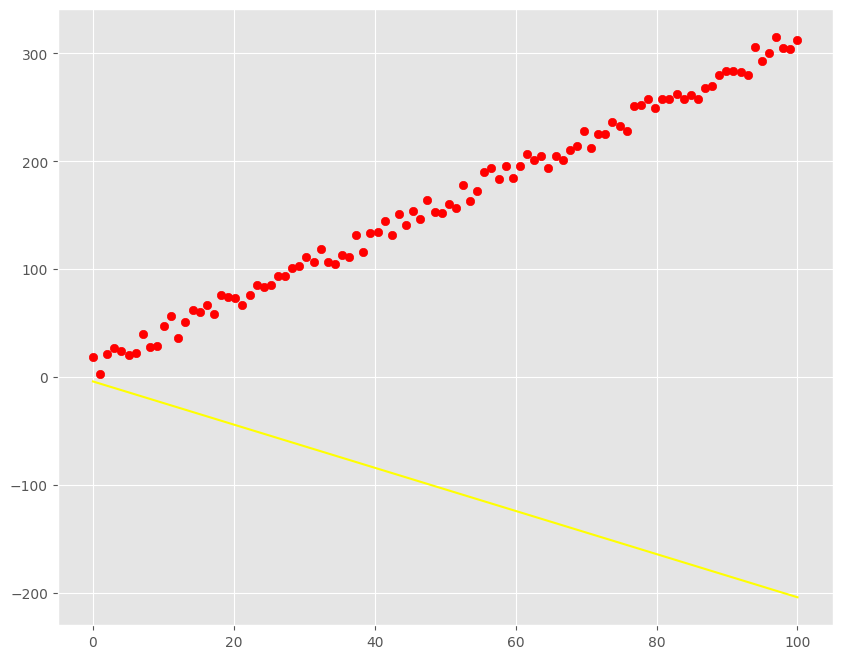

Average distance: 265.59



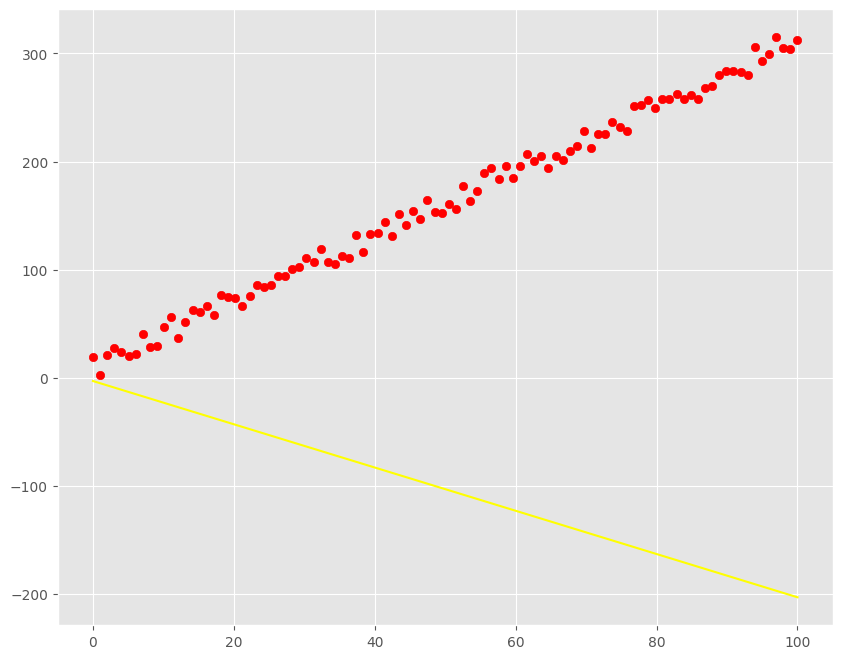

Average distance: 264.59



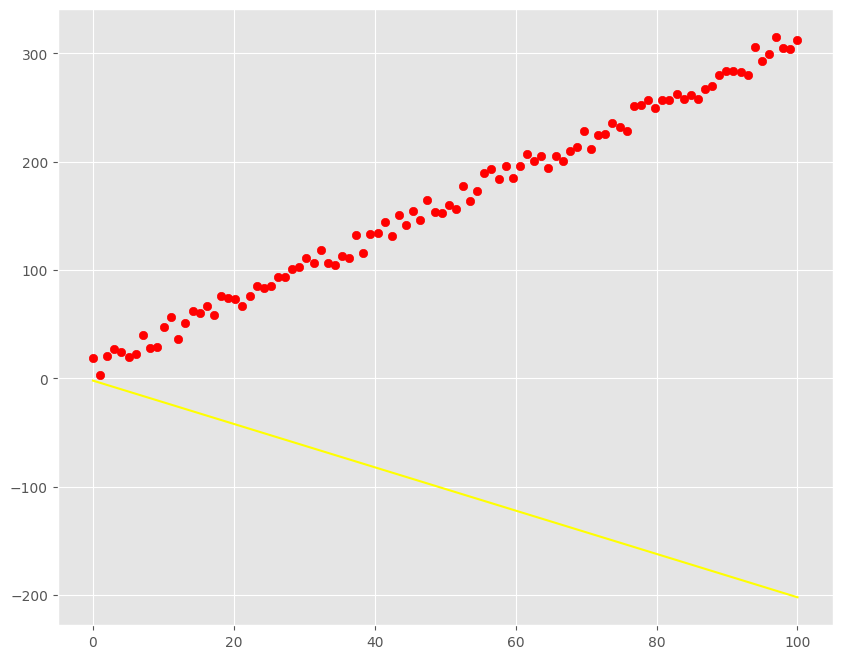

Average distance: 263.59



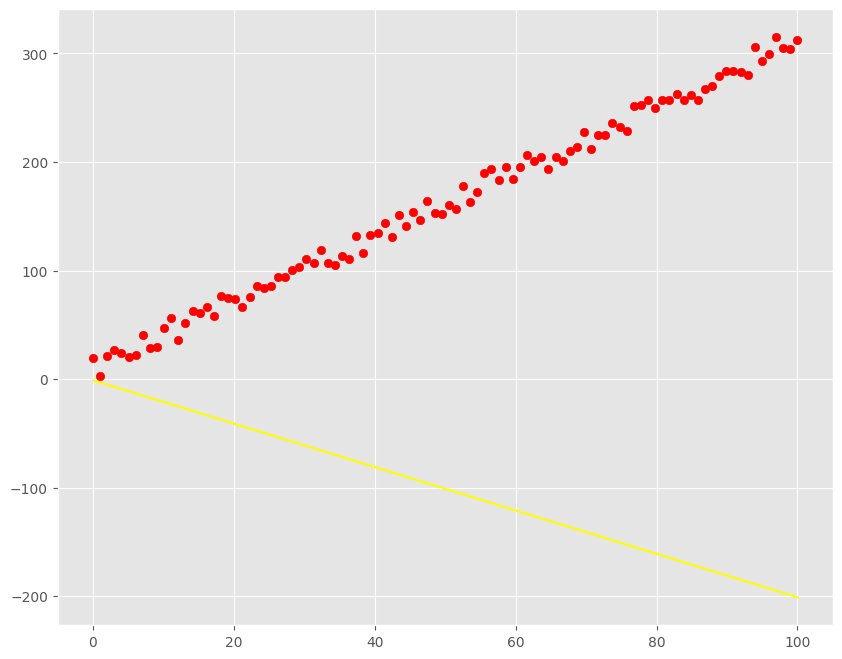

Average distance: 262.59



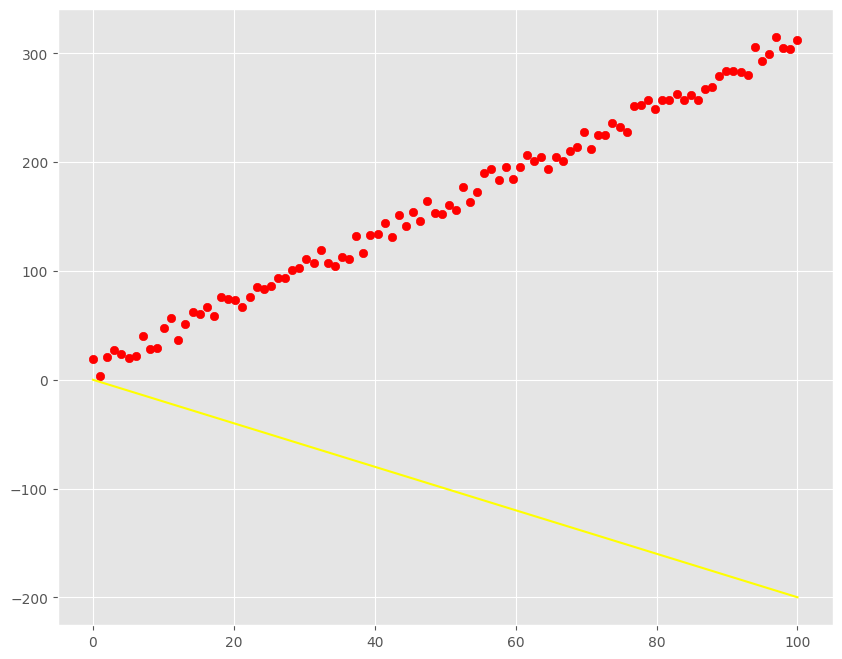

Average distance: 261.59



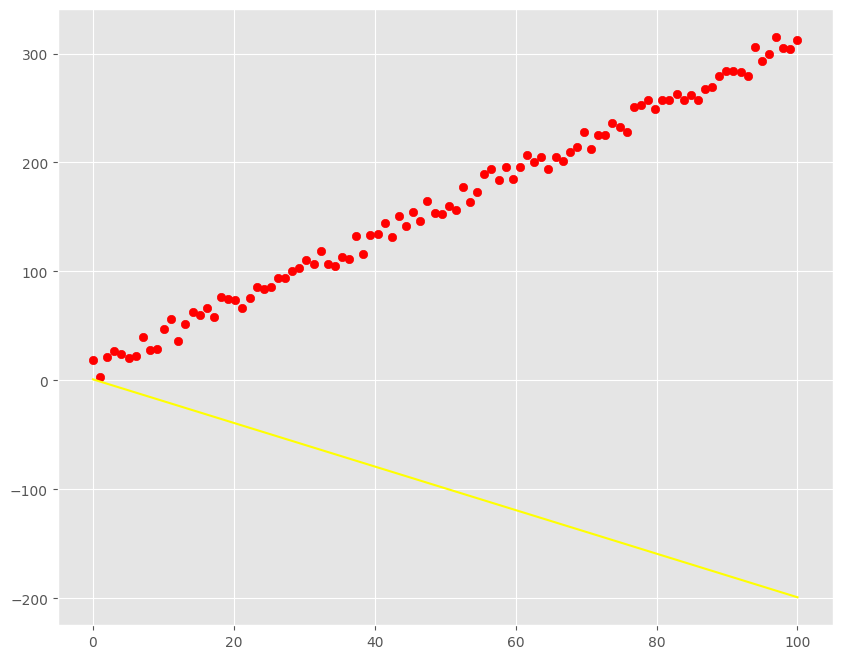

Average distance: 260.59



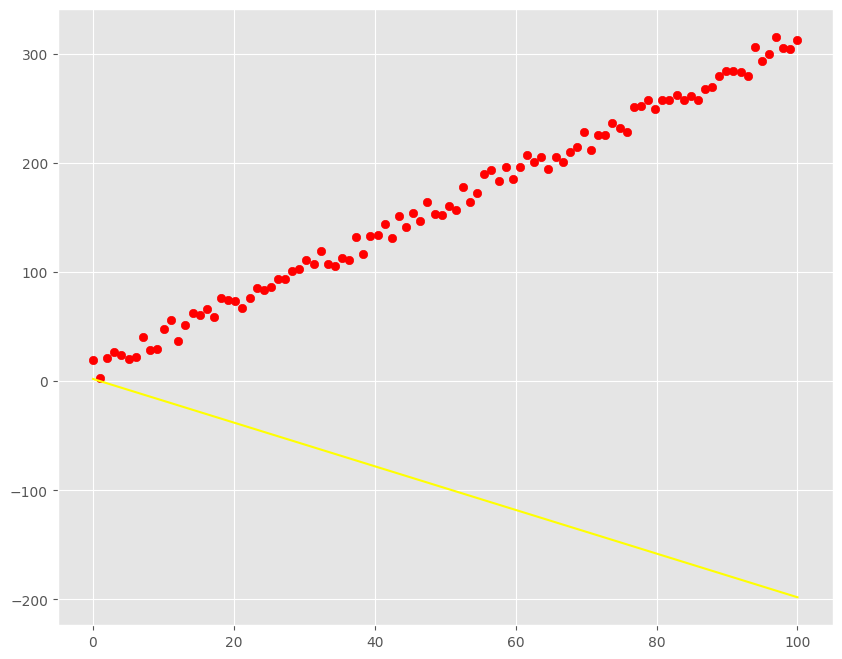

Average distance: 259.59



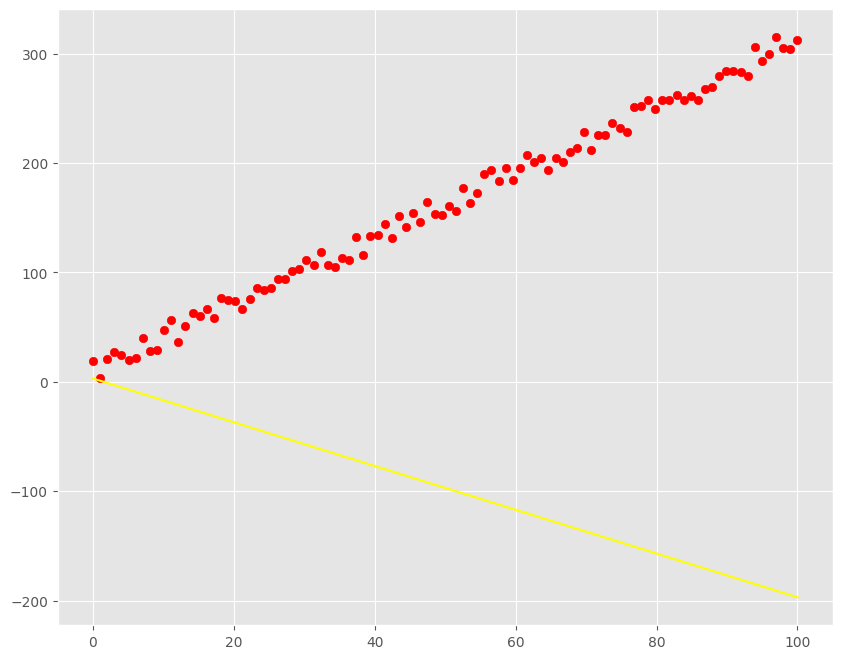

Average distance: 258.59



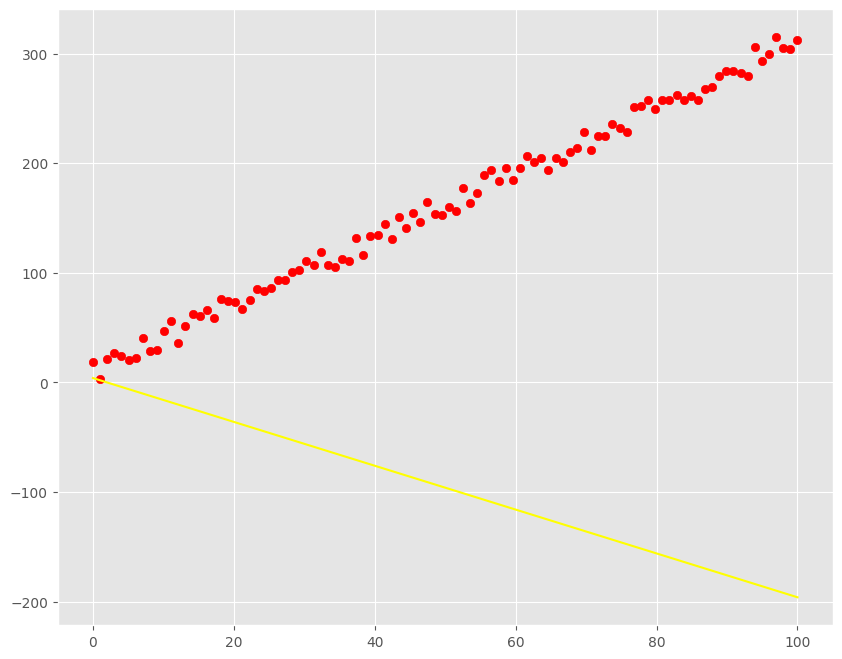

Average distance: 257.59



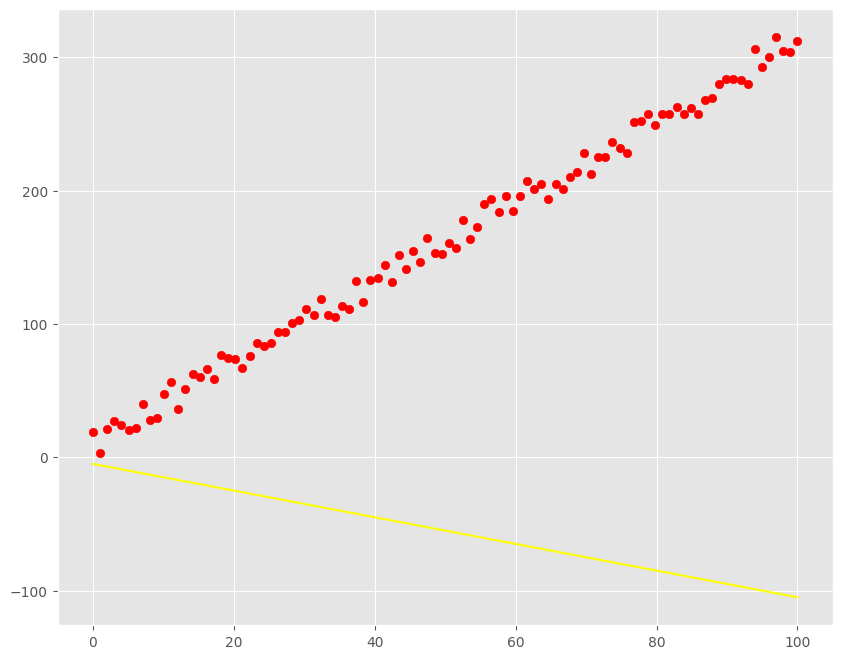

Average distance: 216.59000000000003



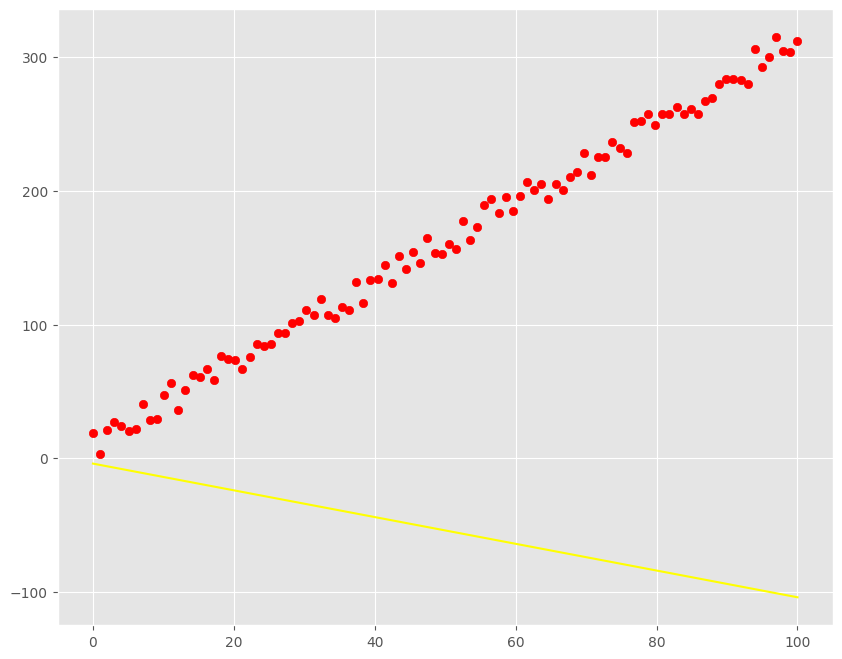

Average distance: 215.59000000000003



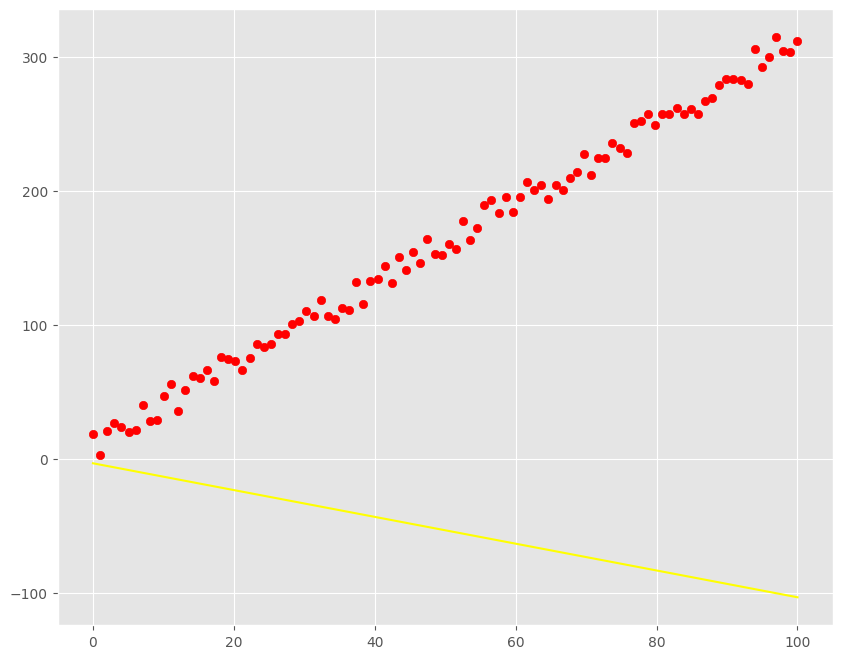

Average distance: 214.59000000000003



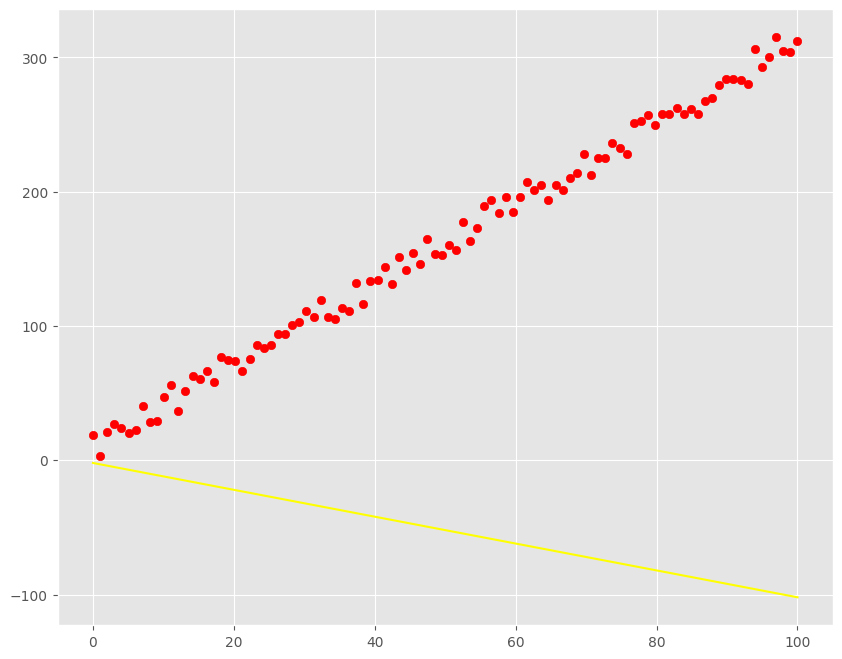

Average distance: 213.59000000000003



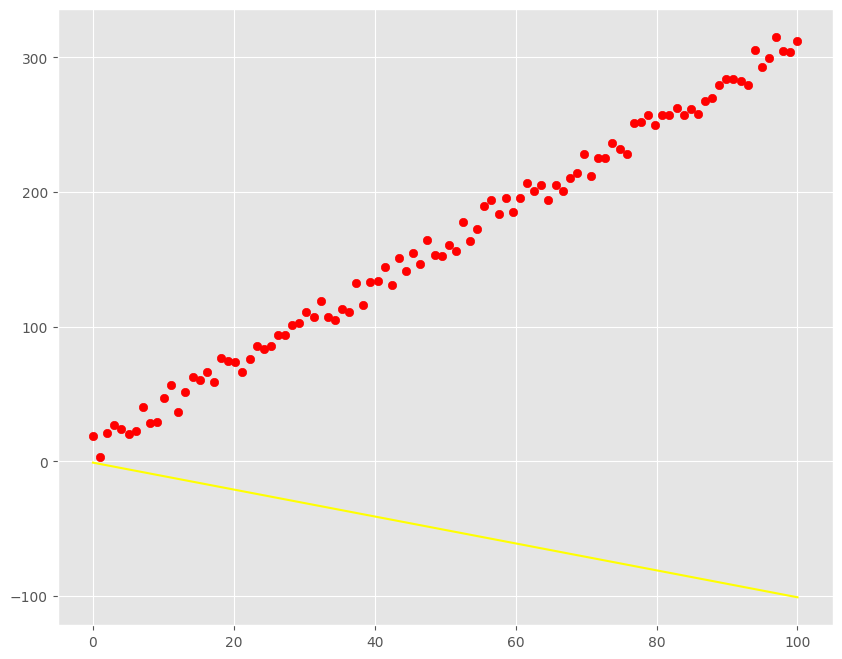

Average distance: 212.59000000000003



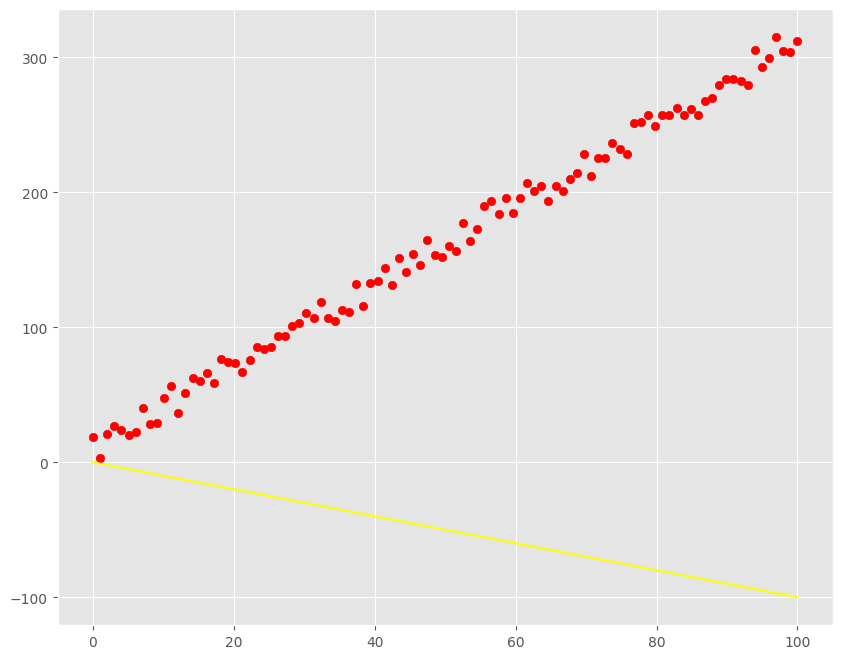

Average distance: 211.59000000000003



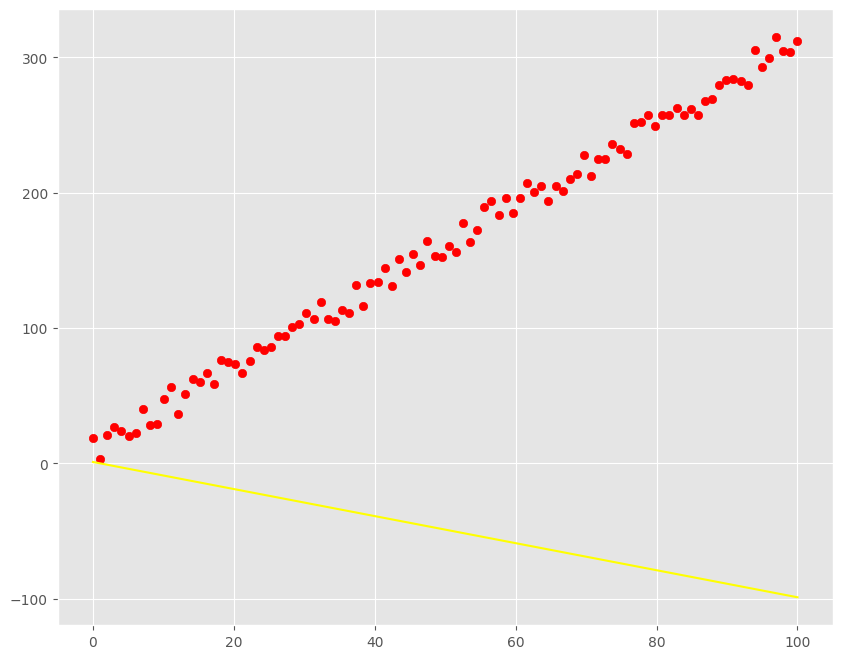

Average distance: 210.59000000000003



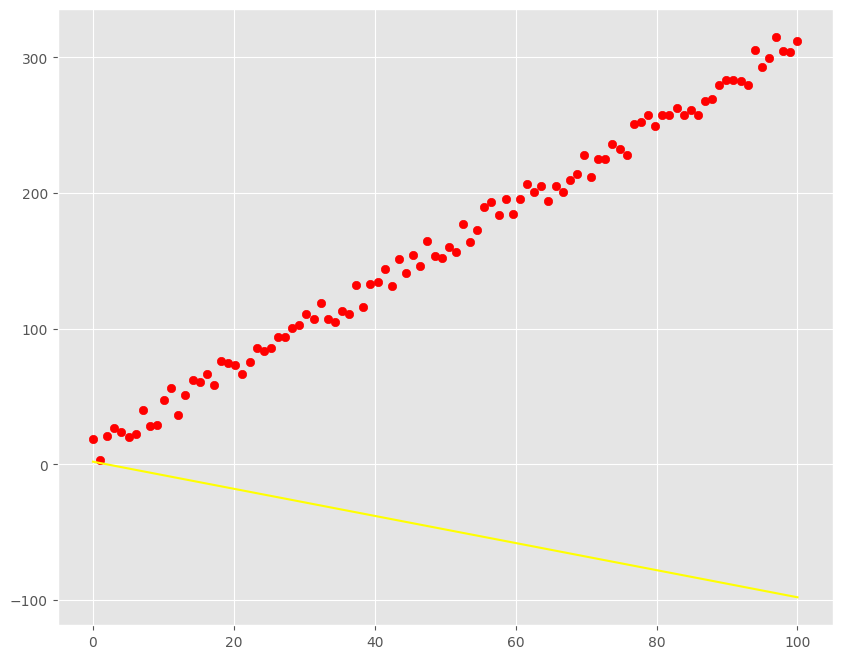

Average distance: 209.59000000000003



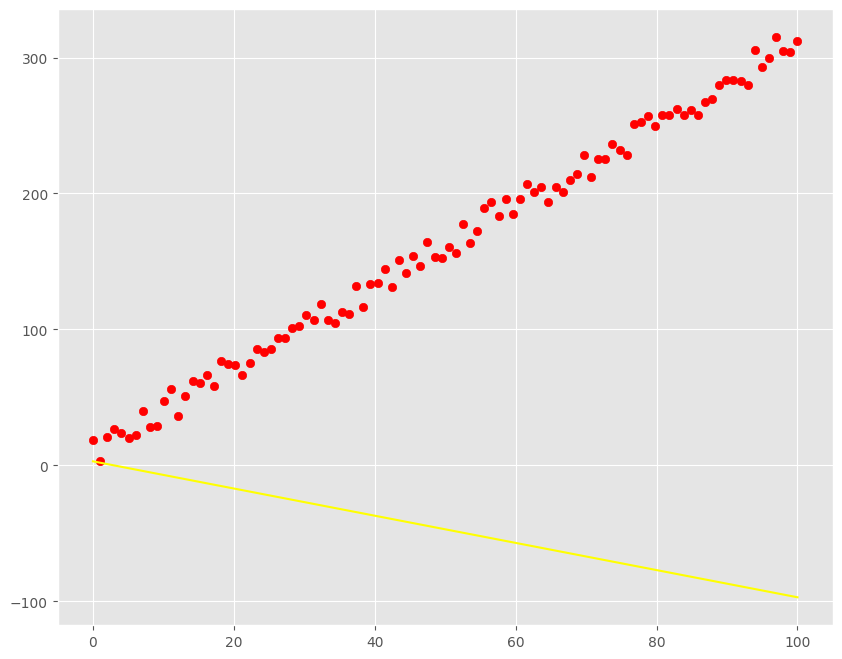

Average distance: 208.59000000000003



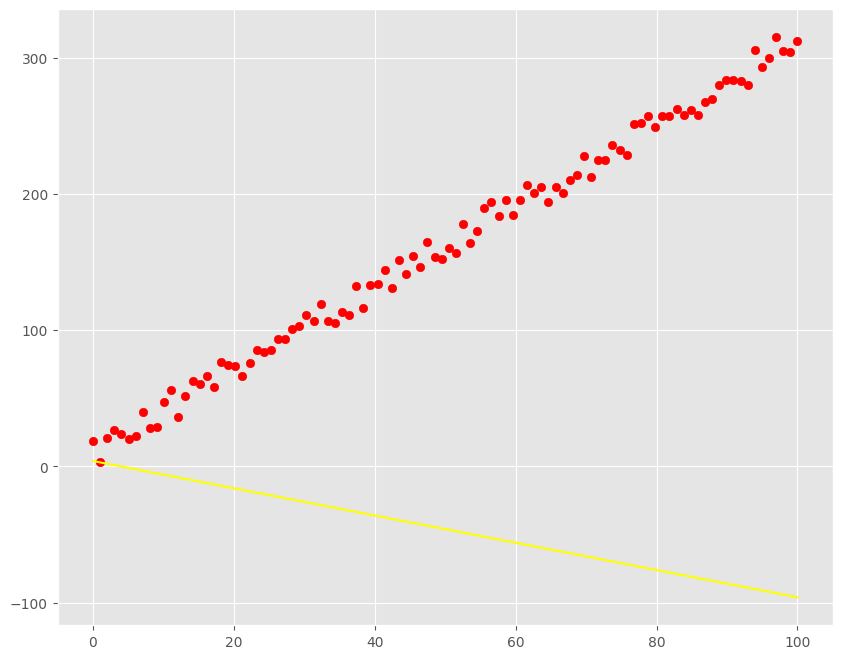

Average distance: 207.59000000000003



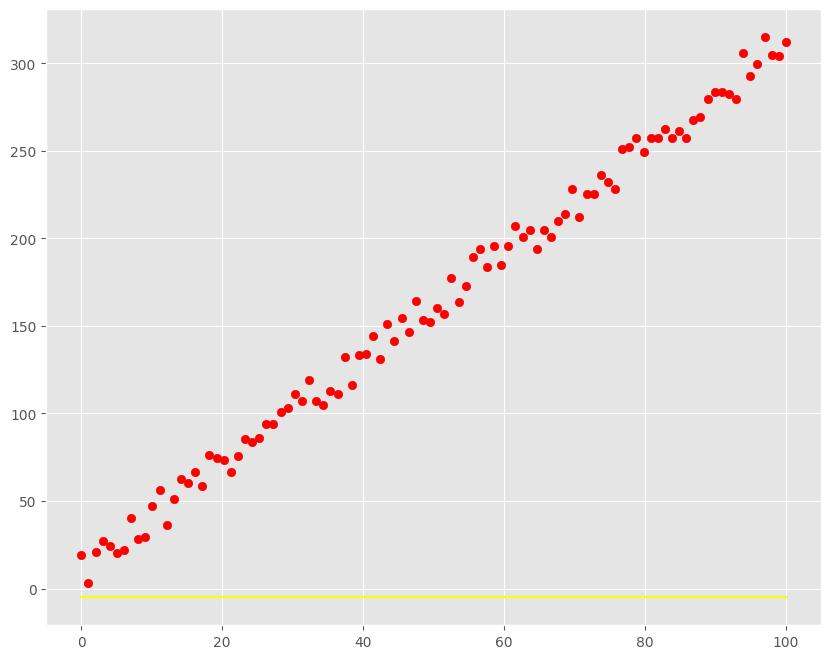

Average distance: 166.59



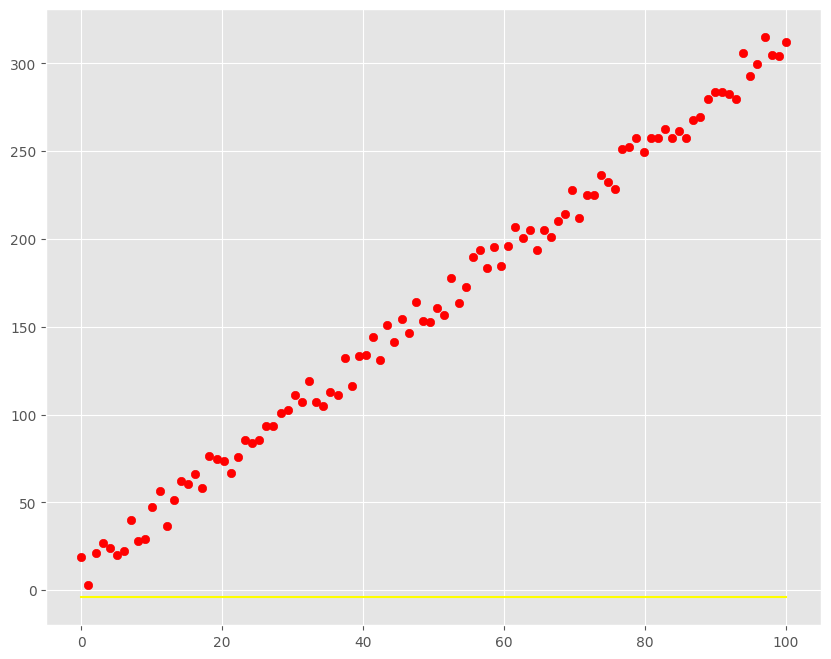

Average distance: 165.59



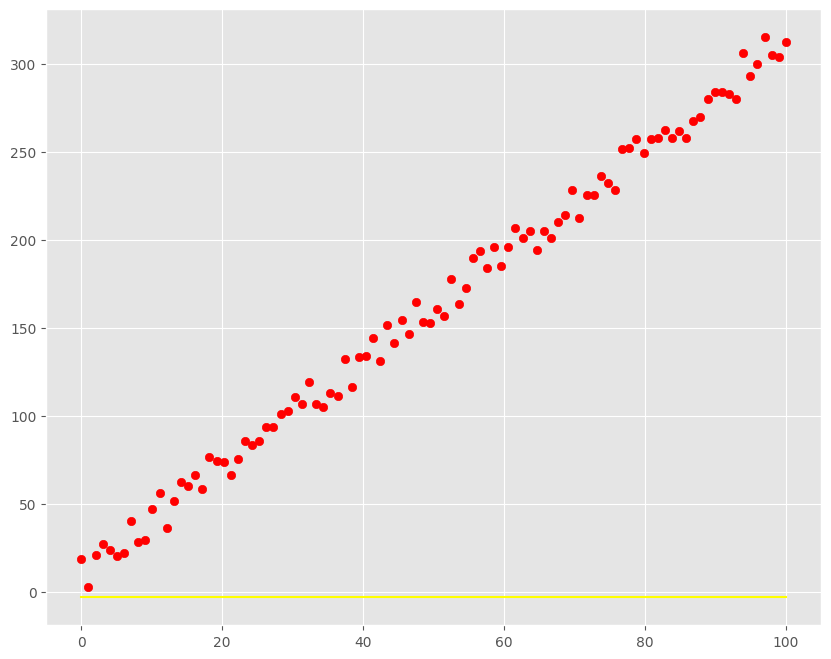

Average distance: 164.59



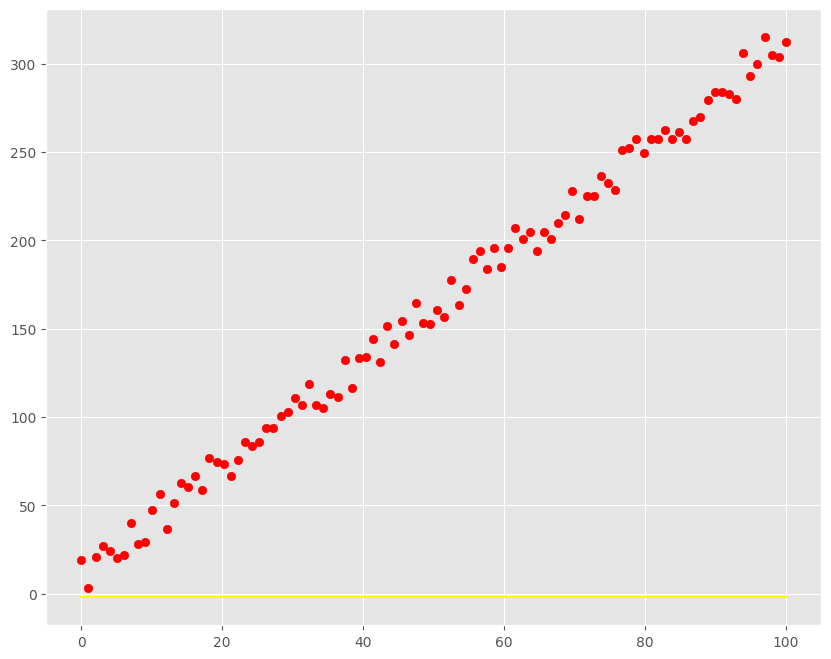

Average distance: 163.59



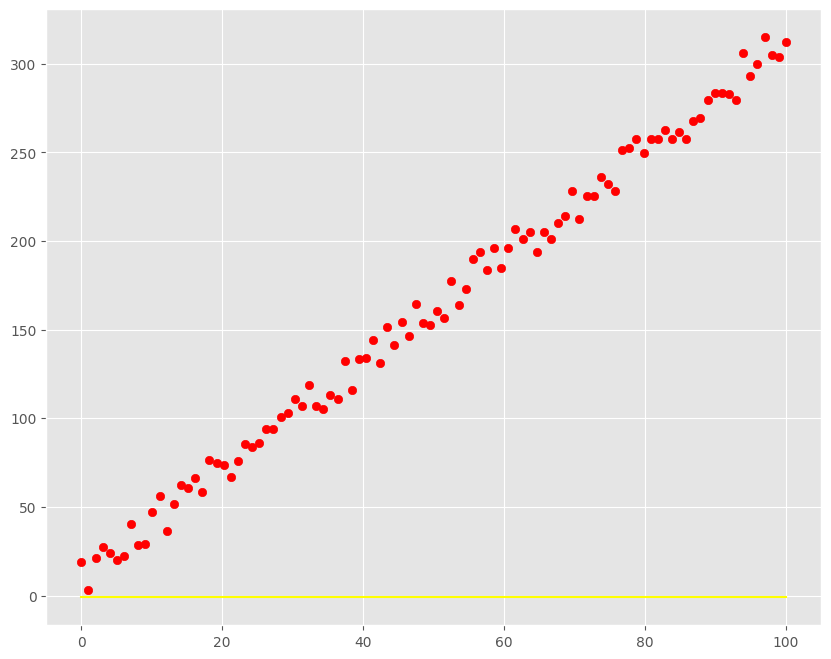

Average distance: 162.59



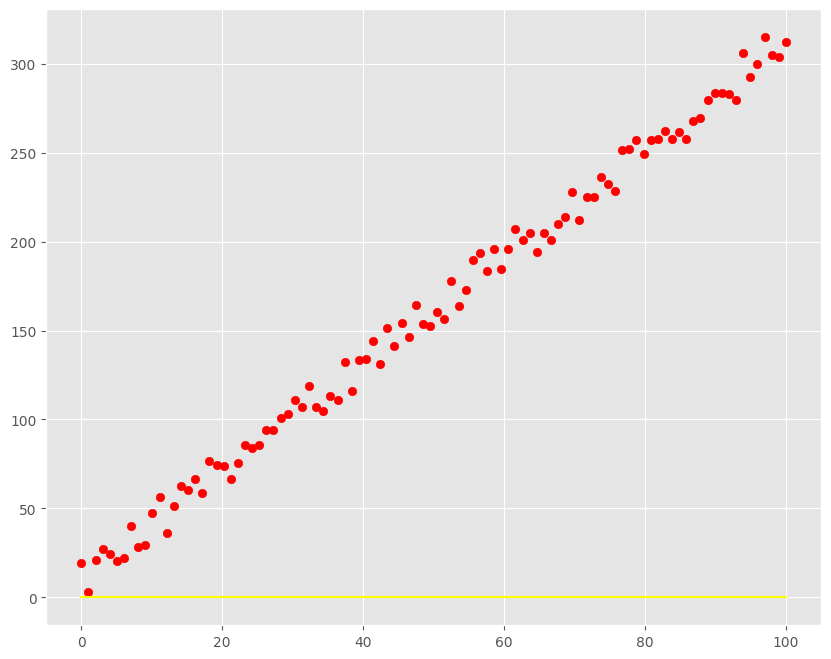

Average distance: 161.59



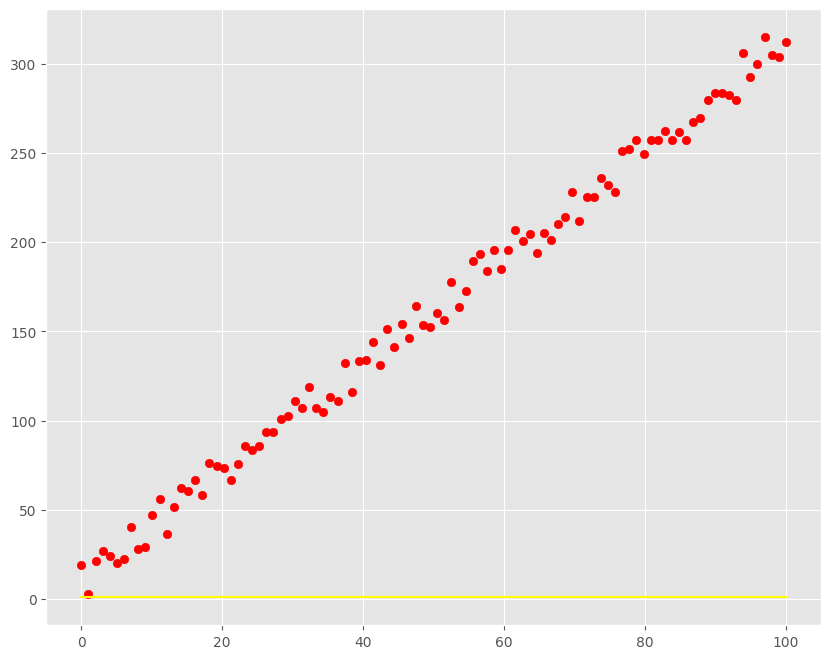

Average distance: 160.59



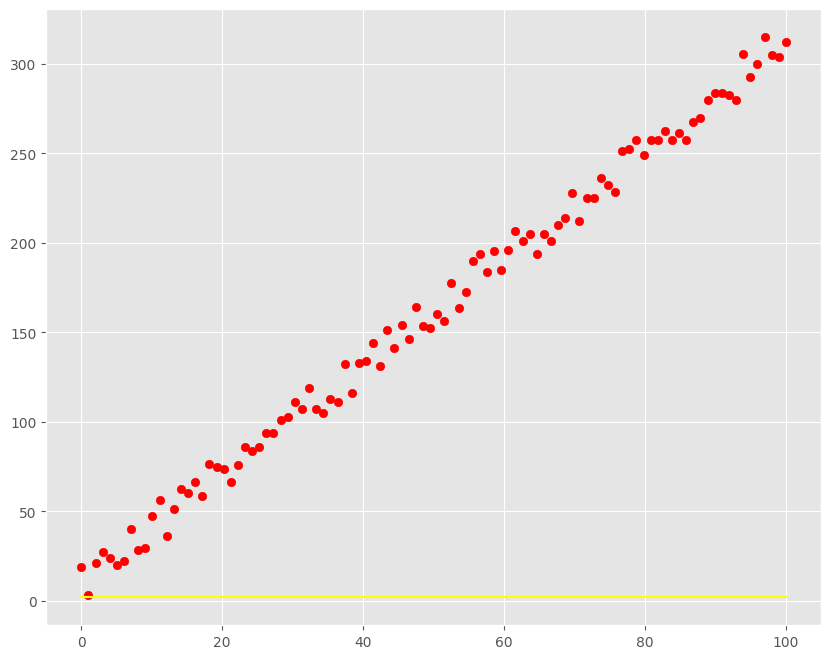

Average distance: 159.59



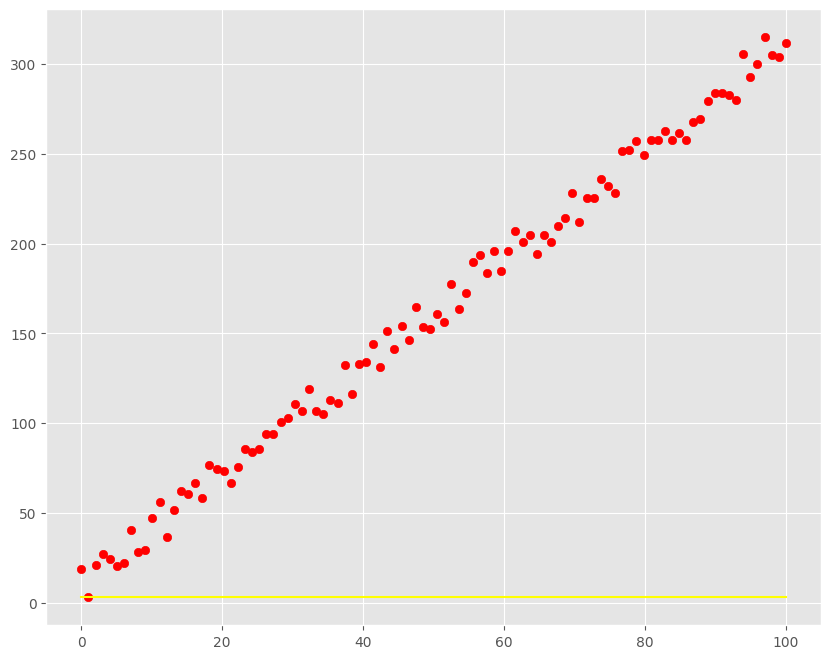

Average distance: 158.59



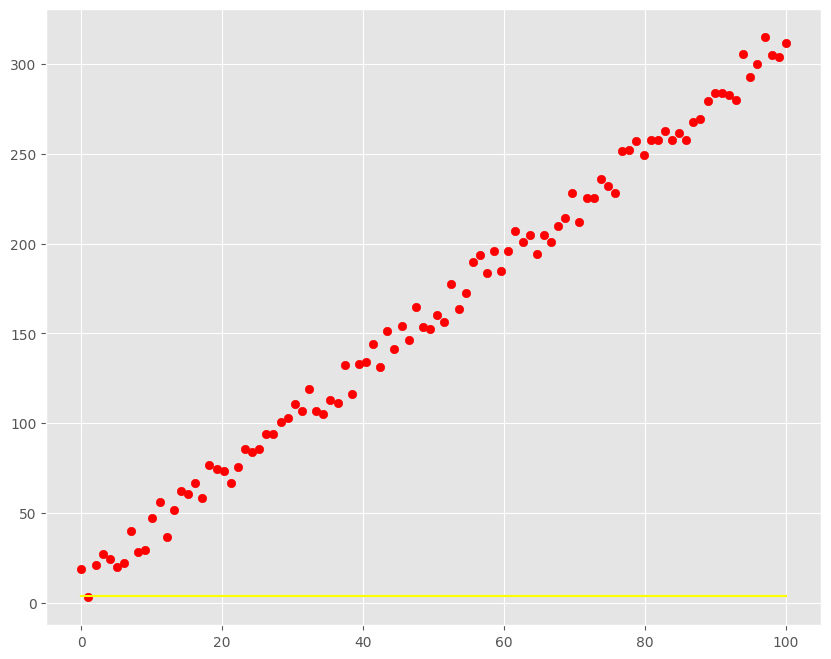

Average distance: 157.60939393939395



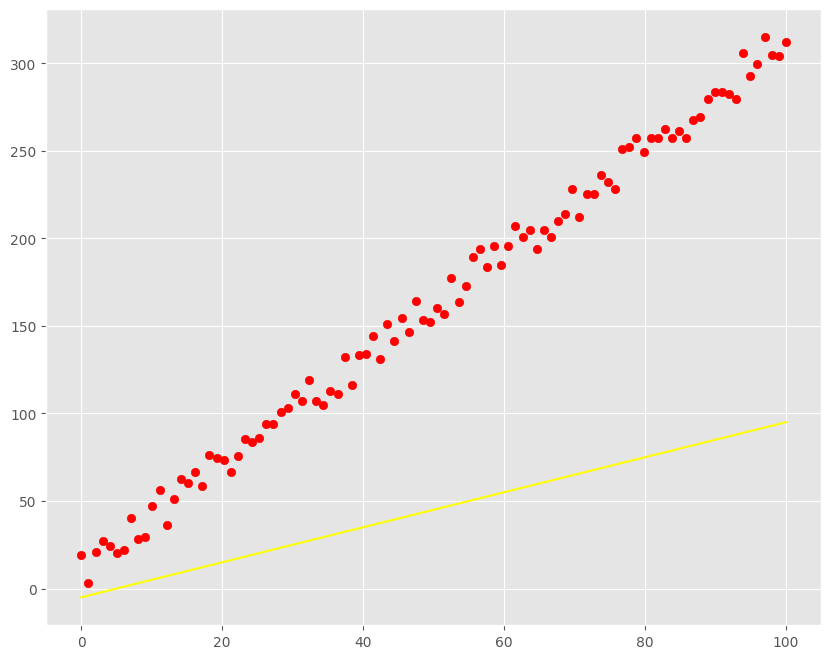

Average distance: 116.59



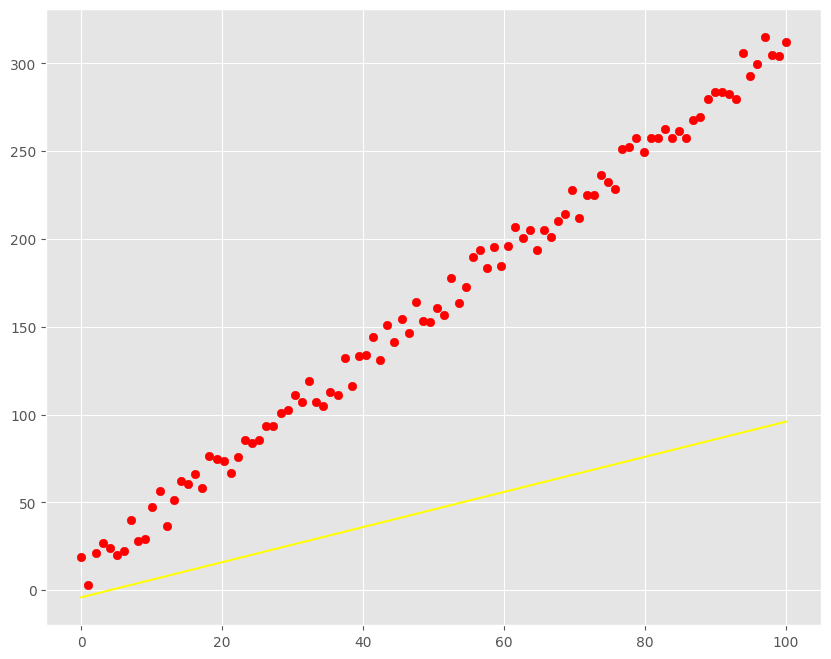

Average distance: 115.59



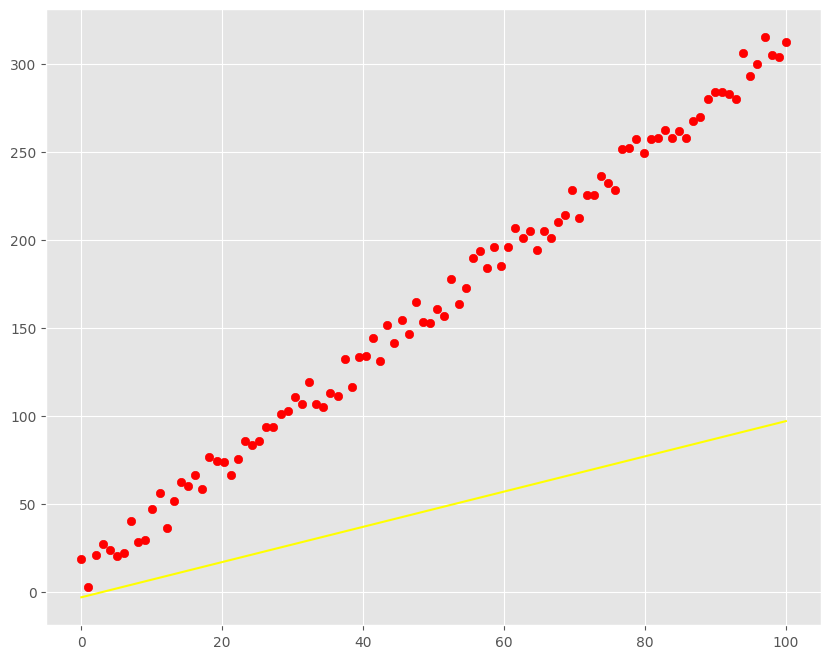

Average distance: 114.59



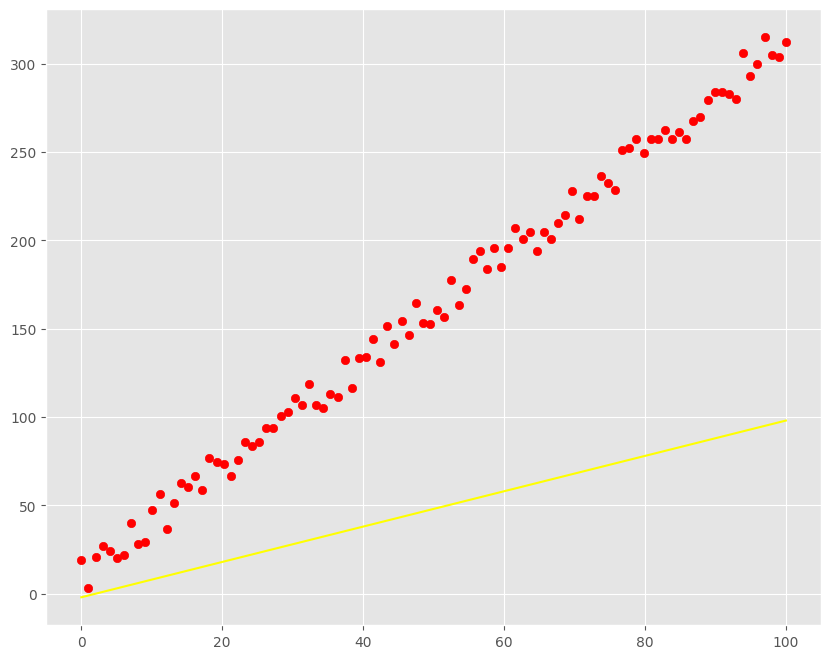

Average distance: 113.59



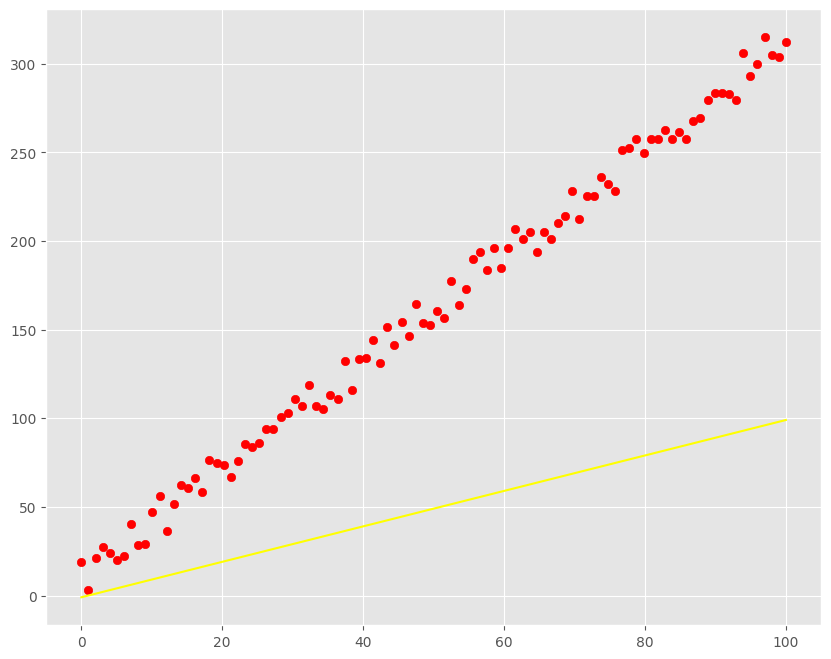

Average distance: 112.59



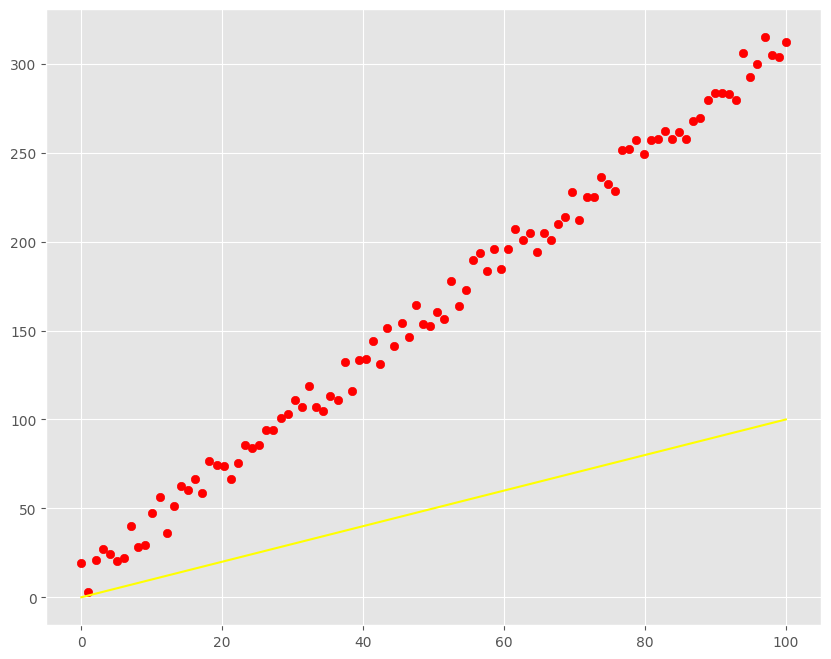

Average distance: 111.59



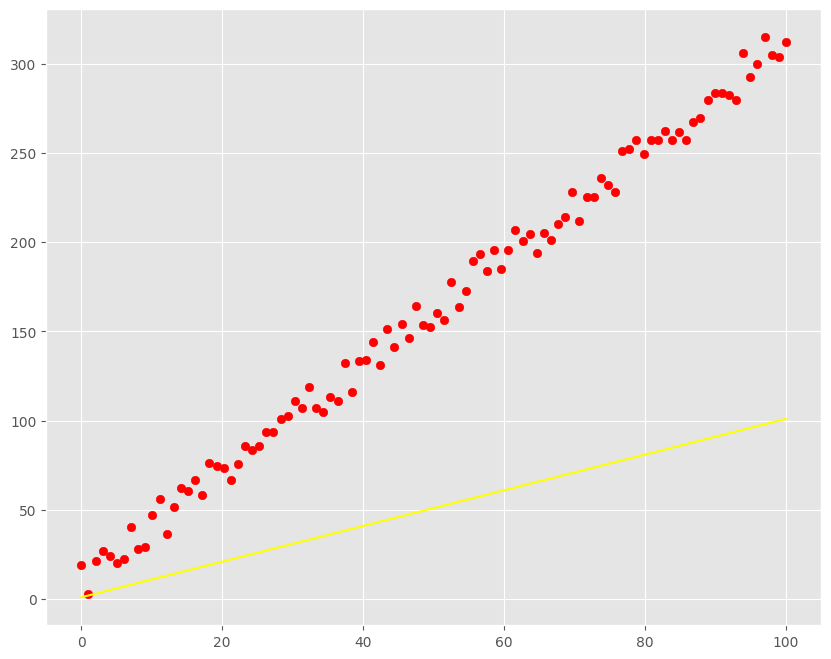

Average distance: 110.59



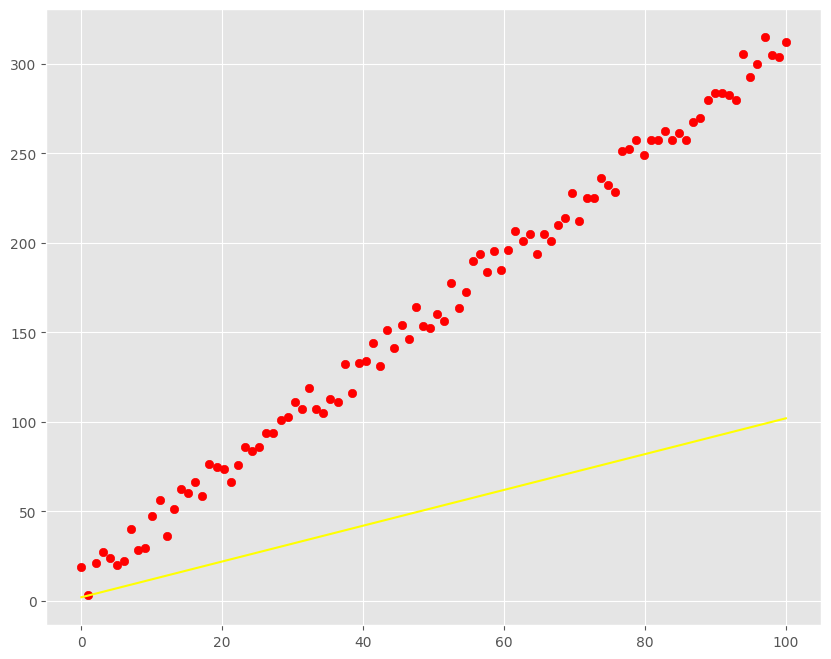

Average distance: 109.59



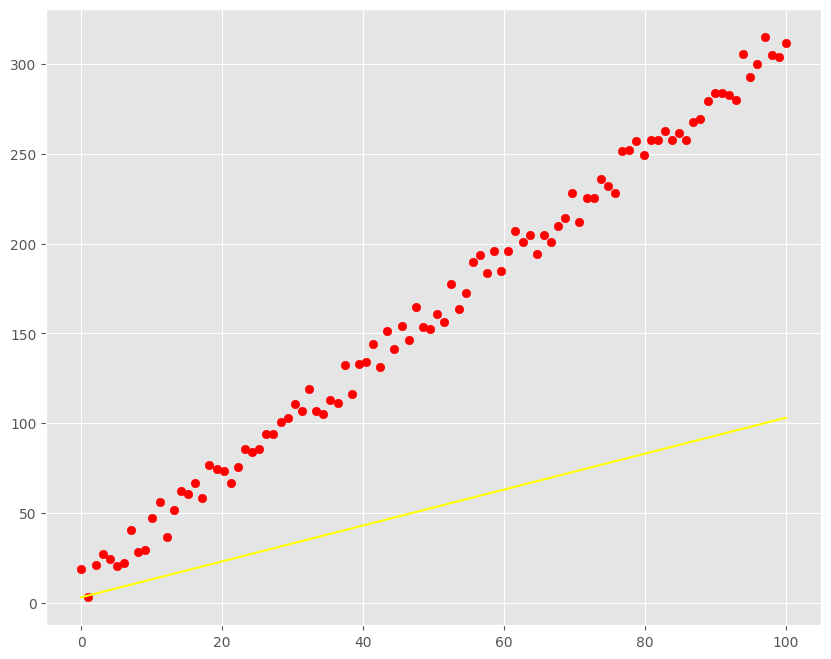

Average distance: 108.60959595959598



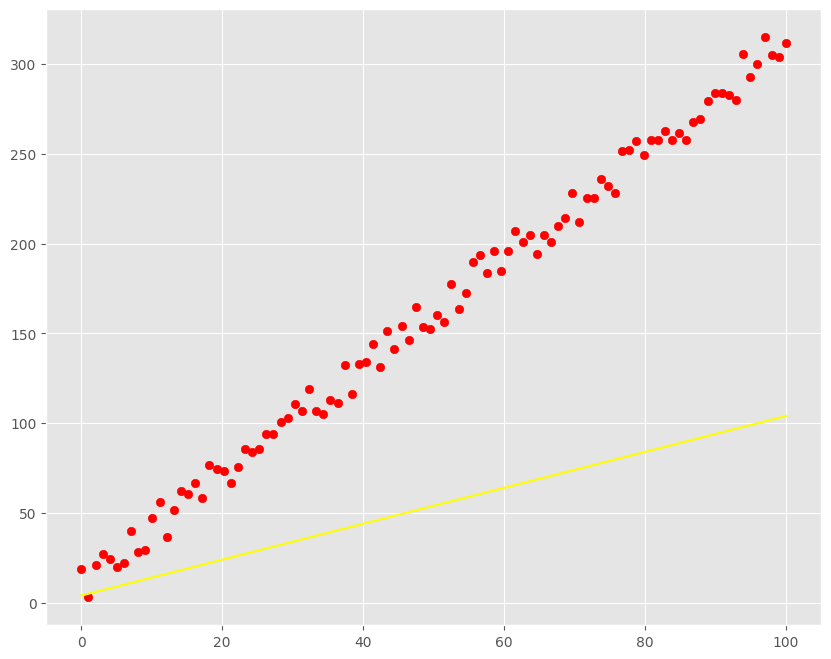

Average distance: 107.62959595959597



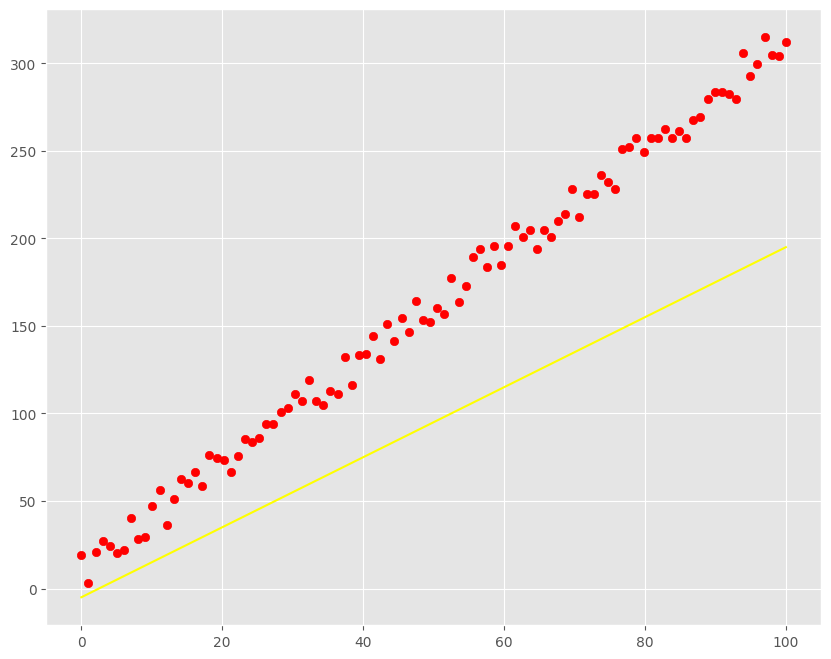

Average distance: 66.59



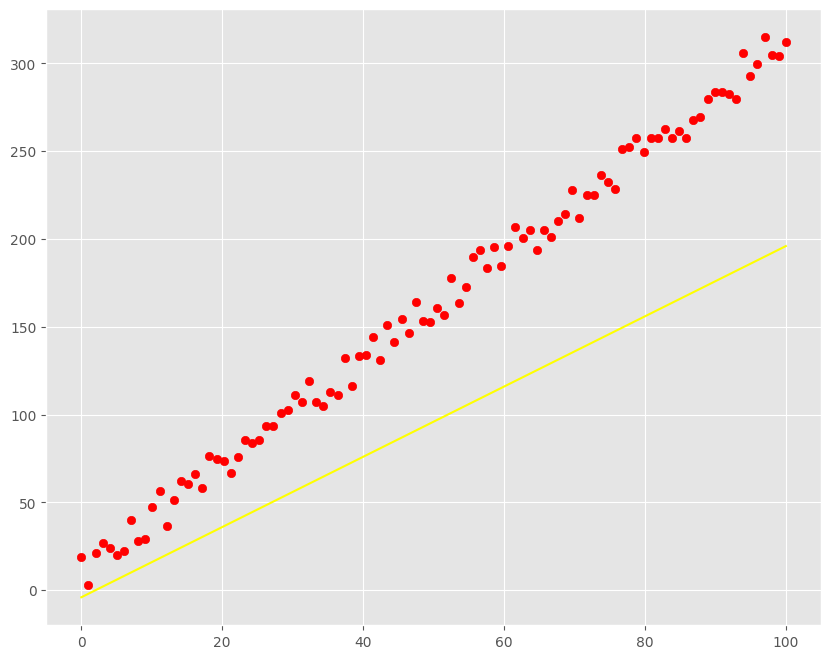

Average distance: 65.59



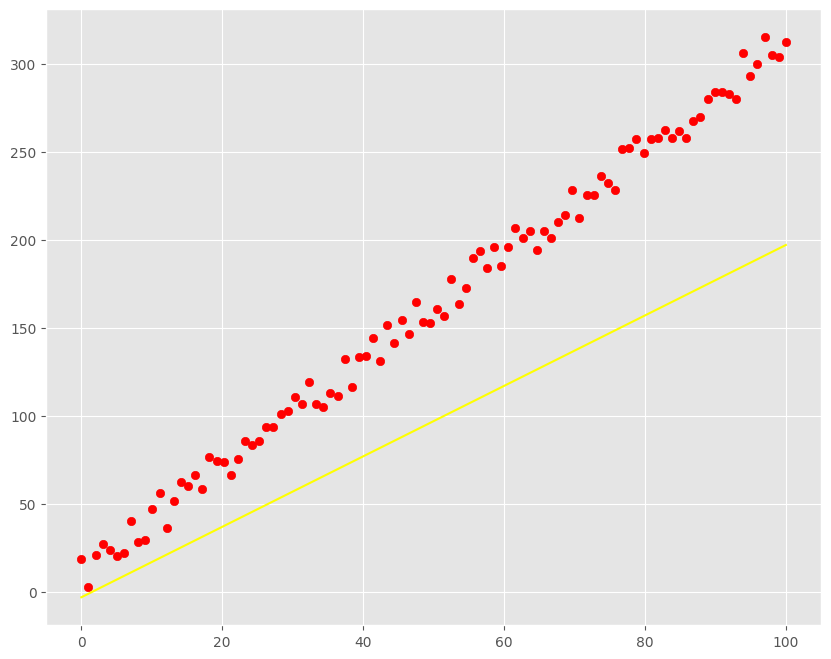

Average distance: 64.59



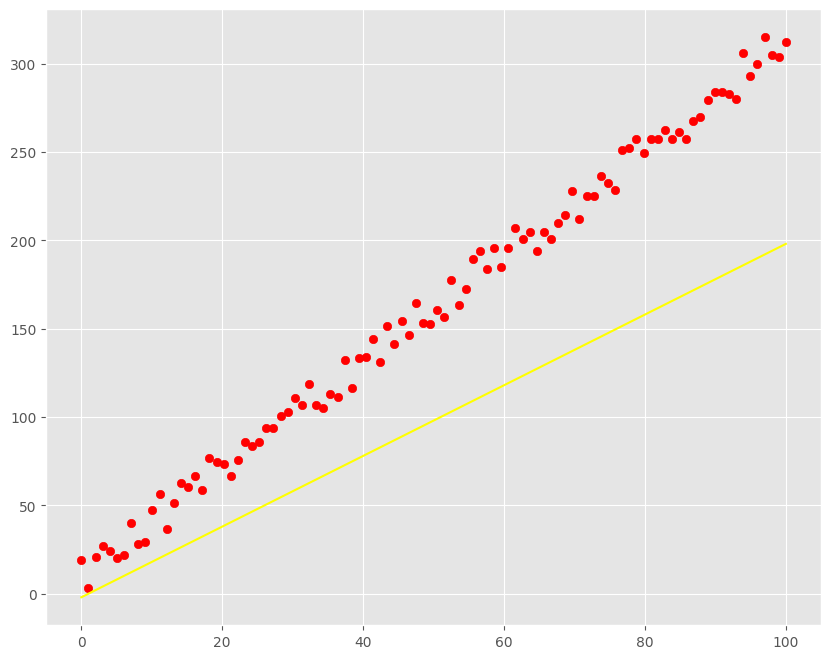

Average distance: 63.59



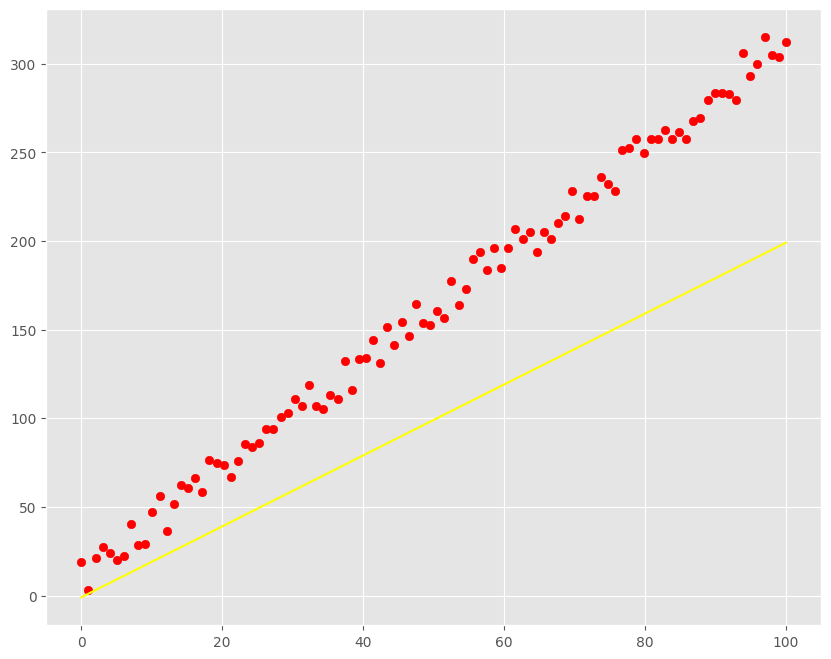

Average distance: 62.59



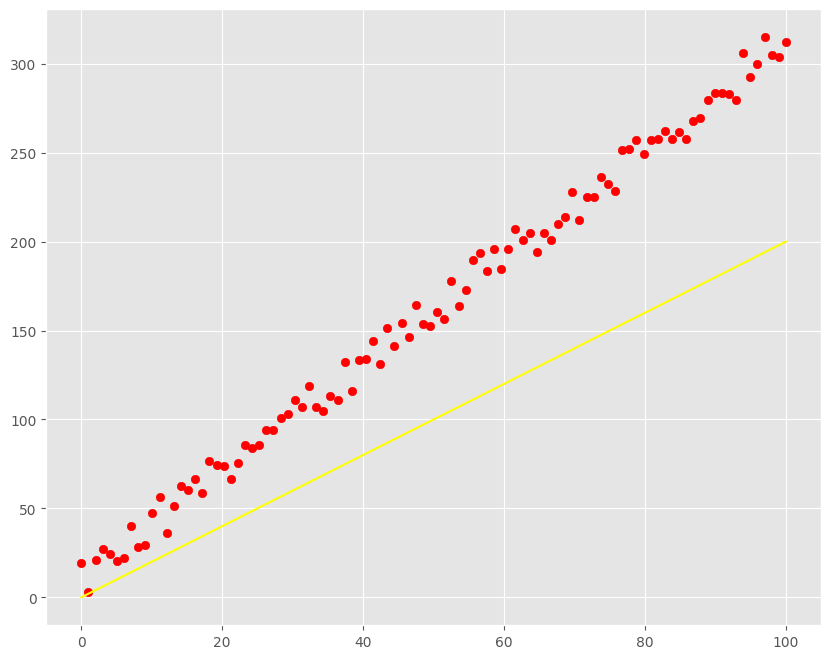

Average distance: 61.59



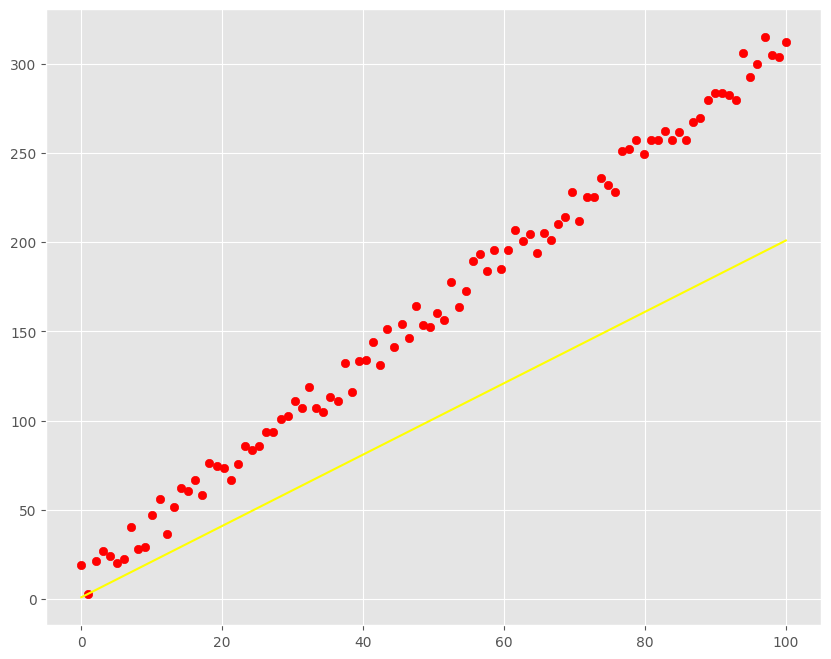

Average distance: 60.59



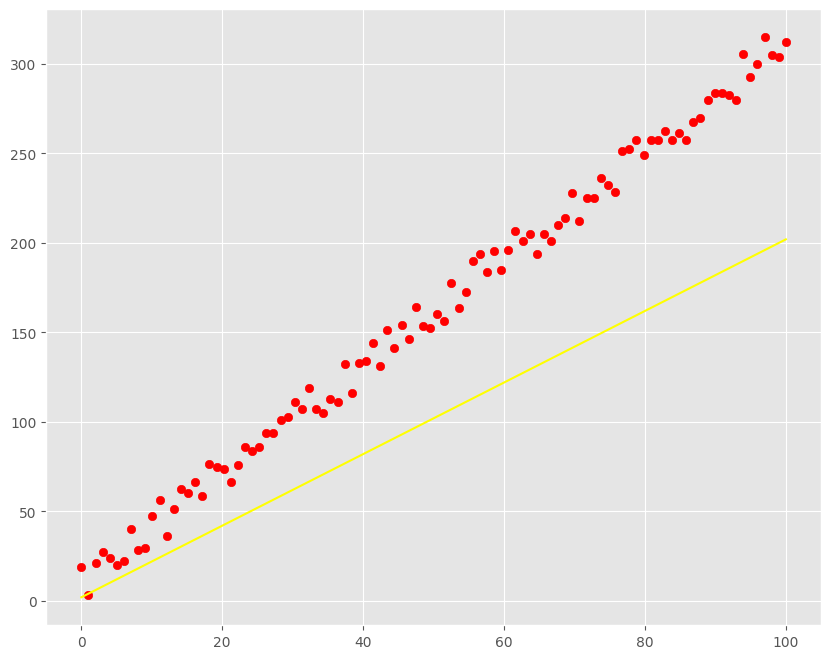

Average distance: 59.60979797979799



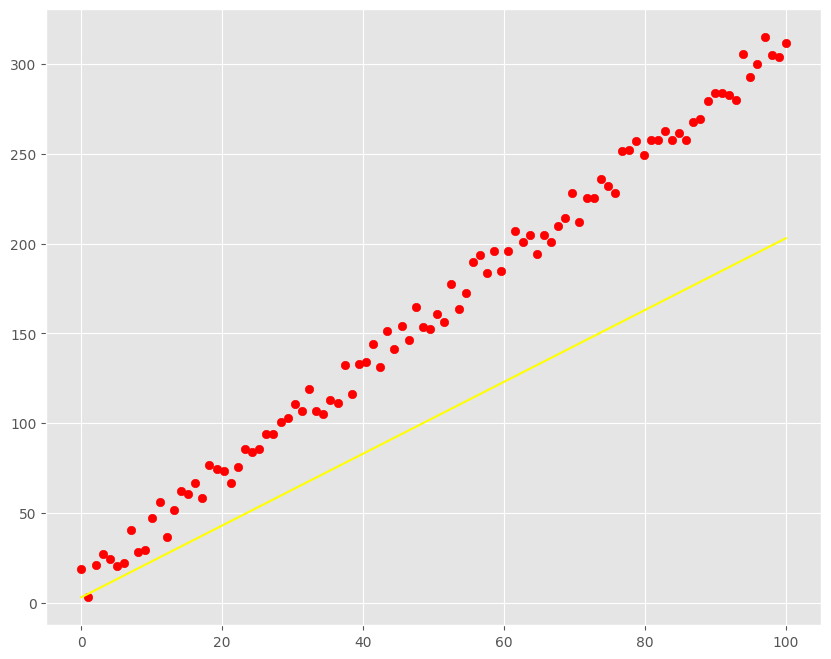

Average distance: 58.629797979797985



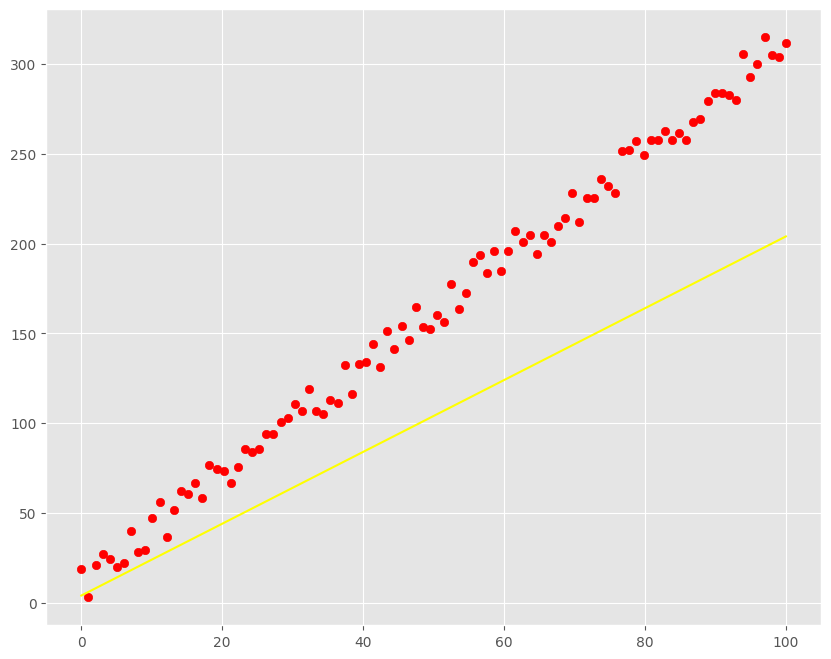

Average distance: 57.64979797979799



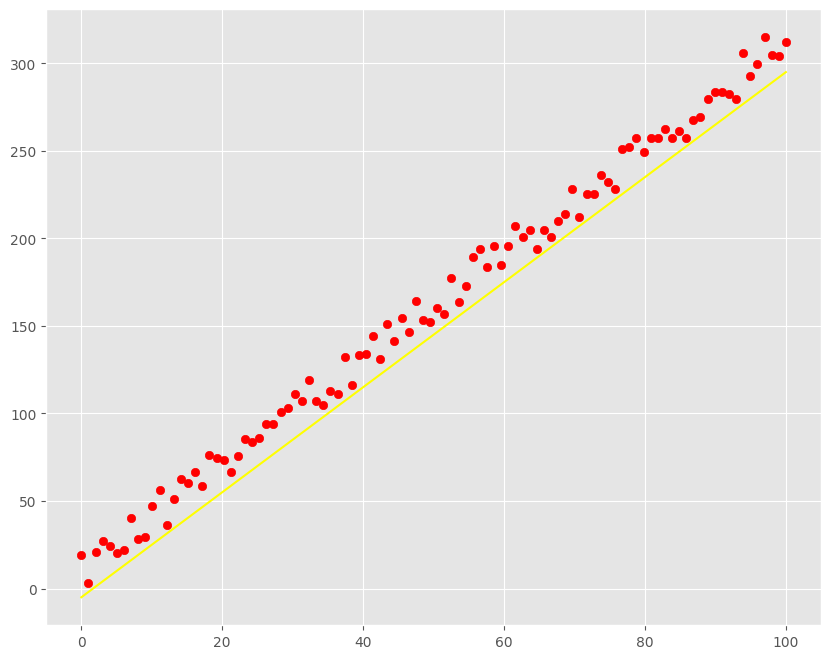

Average distance: 16.59



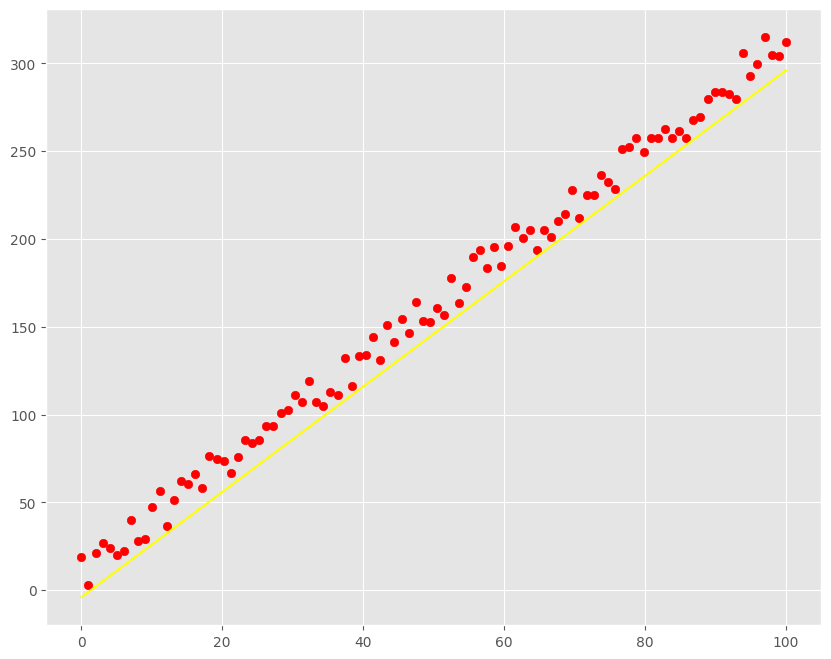

Average distance: 15.59



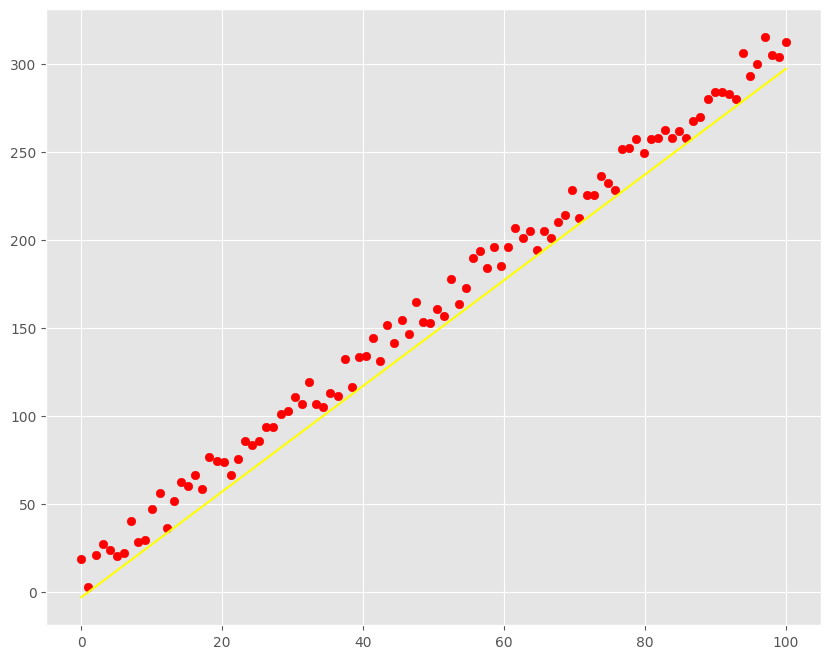

Average distance: 14.59



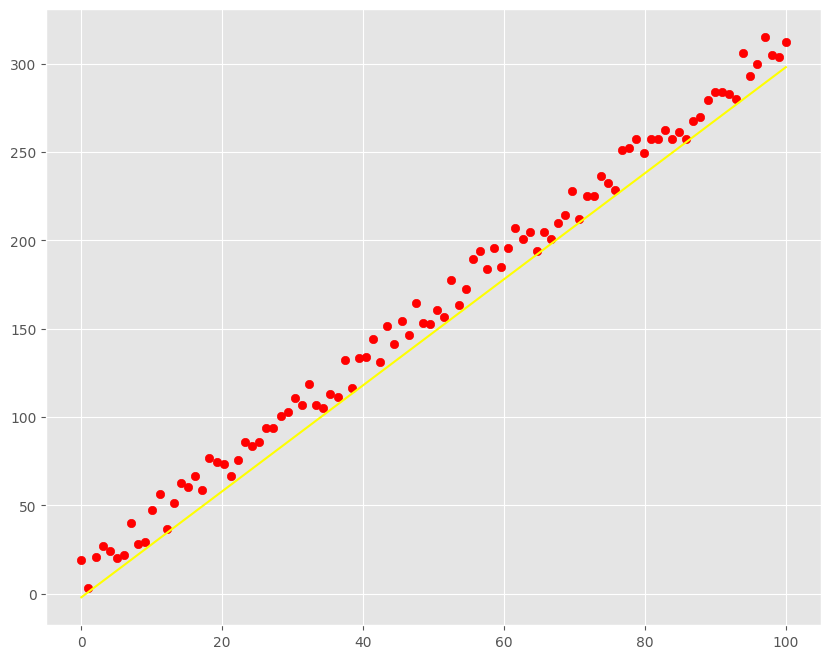

Average distance: 13.59



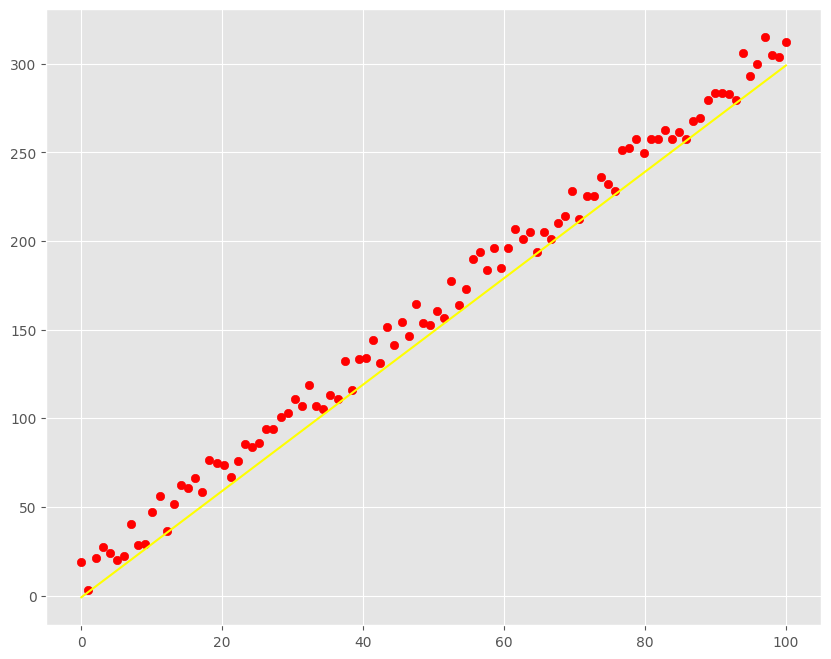

Average distance: 12.59



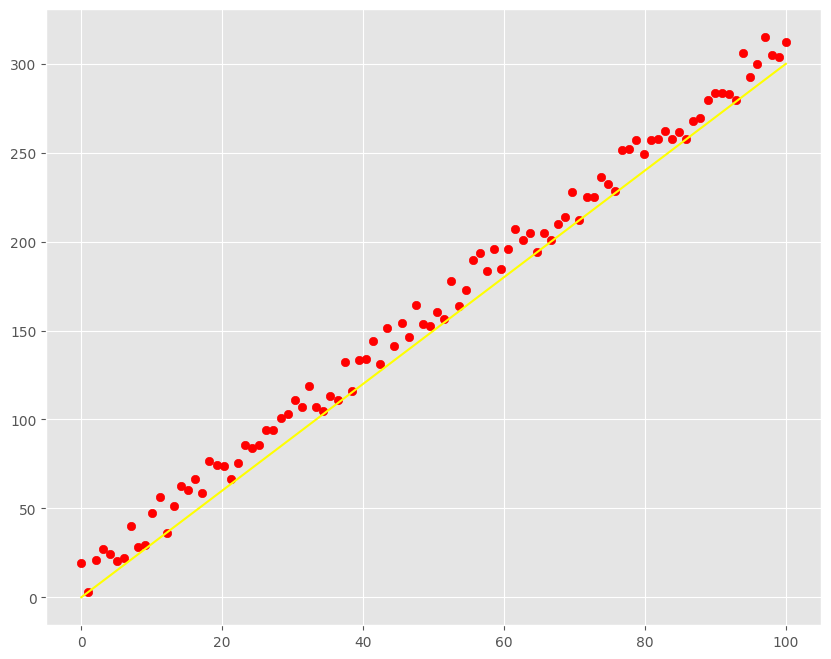

Average distance: 11.59



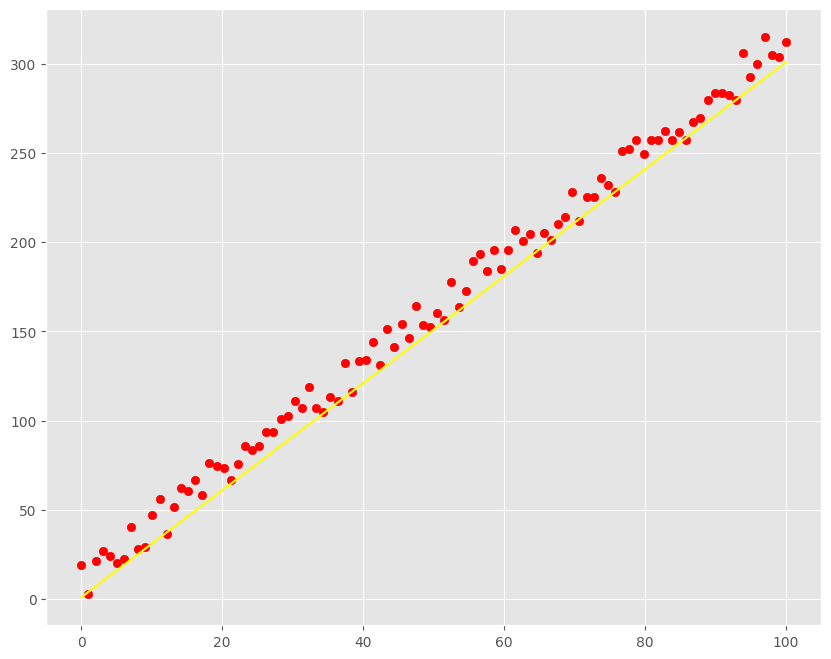

Average distance: 10.69



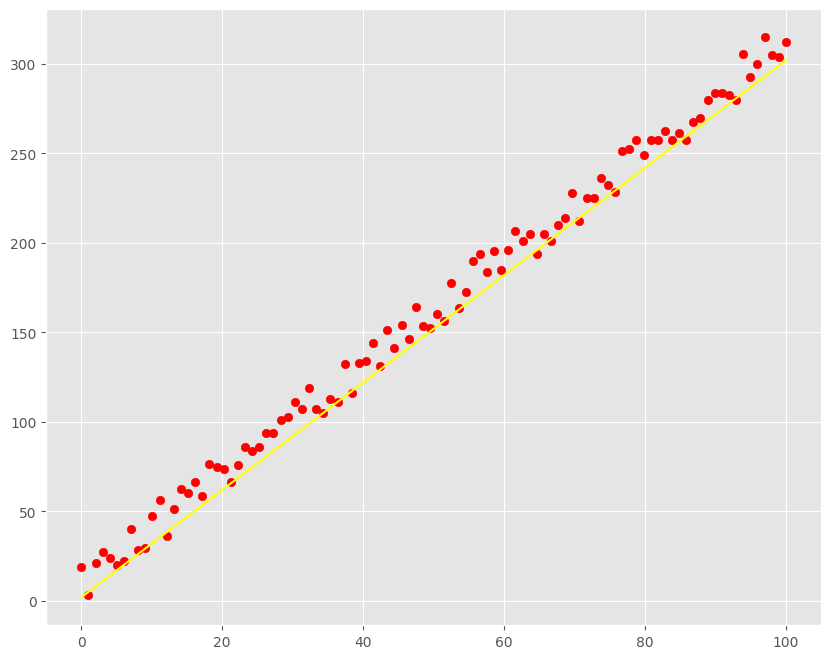

Average distance: 9.87



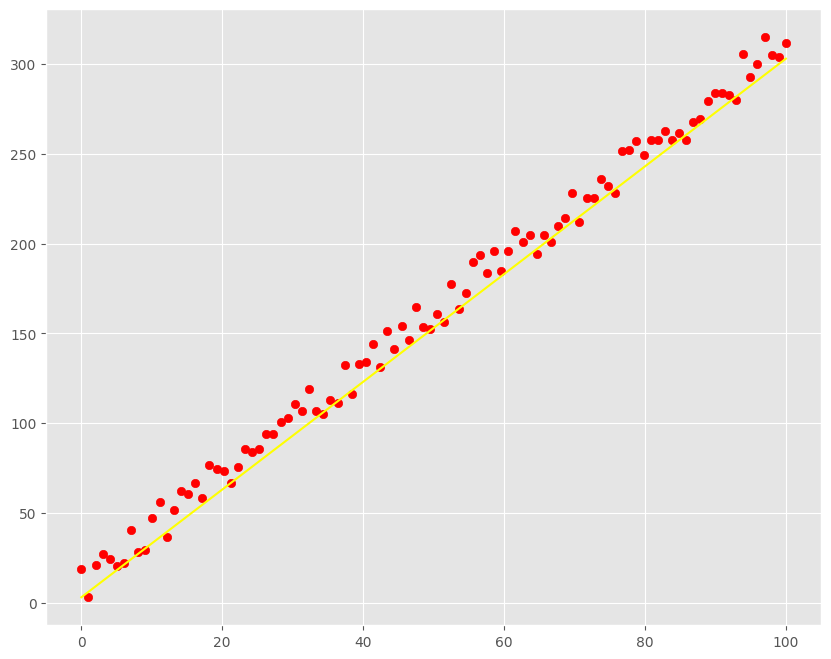

Average distance: 9.13



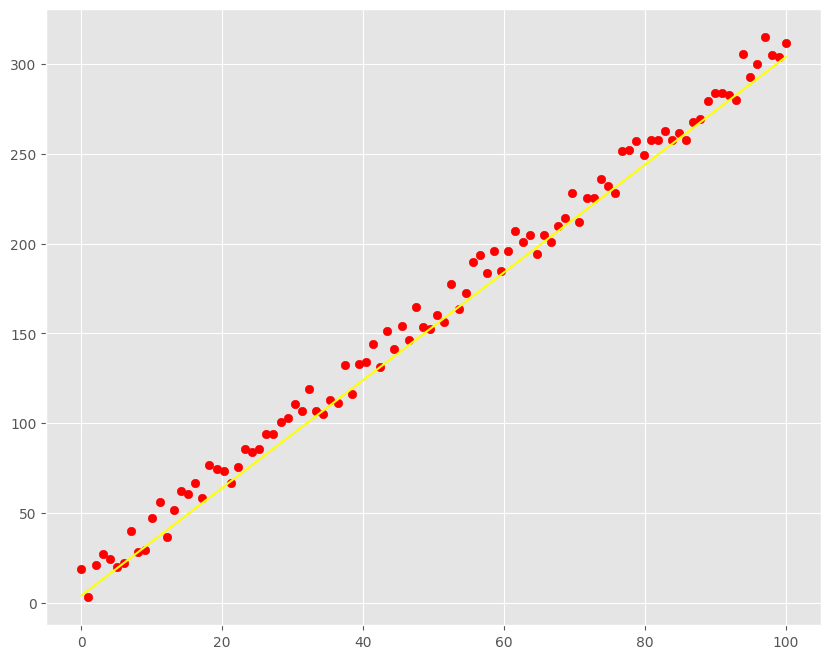

Average distance: 8.43



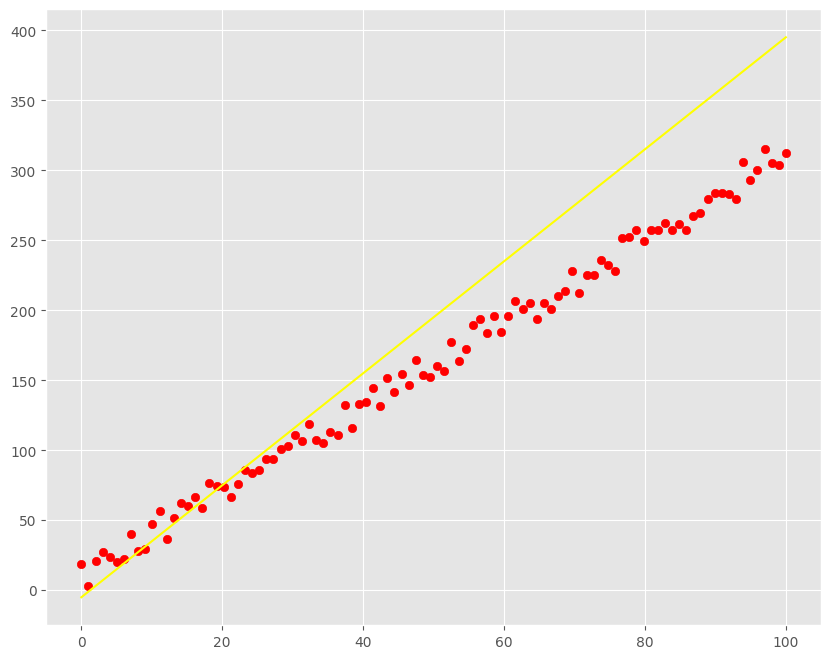

Average distance: 36.83929292929293



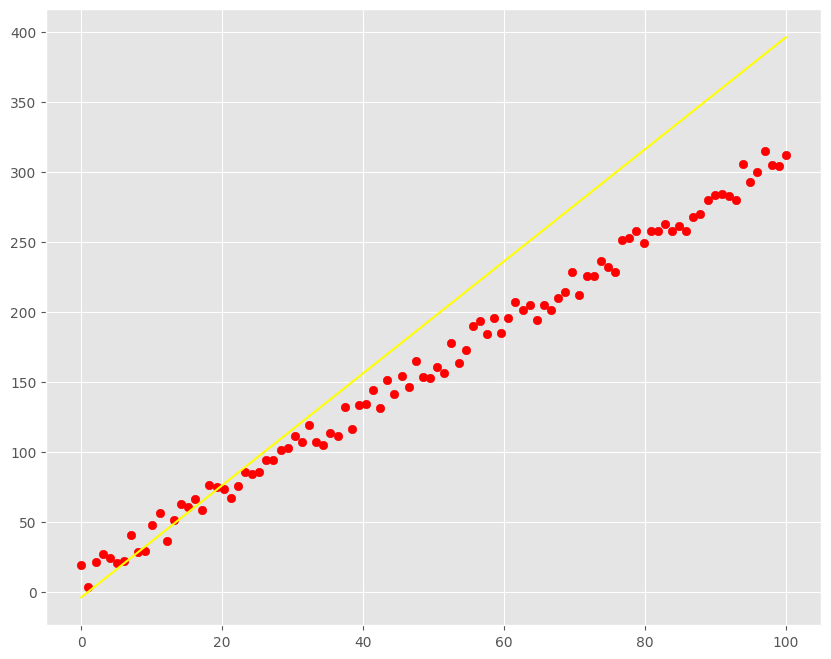

Average distance: 37.5009090909091



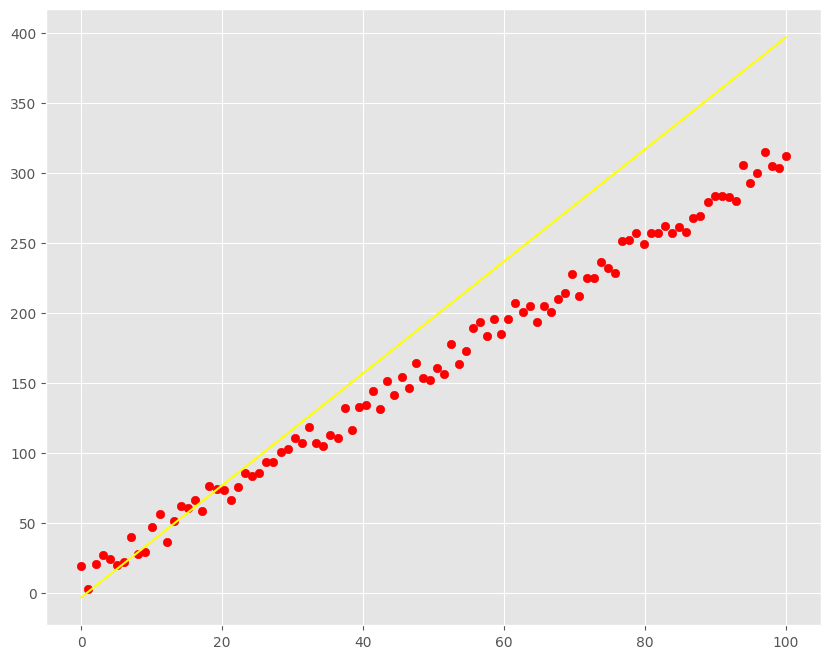

Average distance: 38.1809090909091



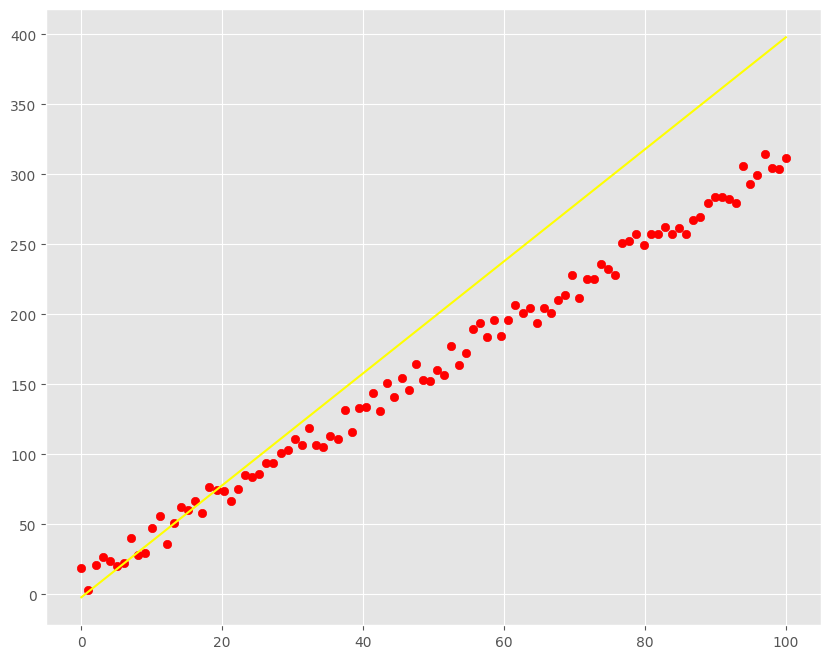

Average distance: 38.8659595959596



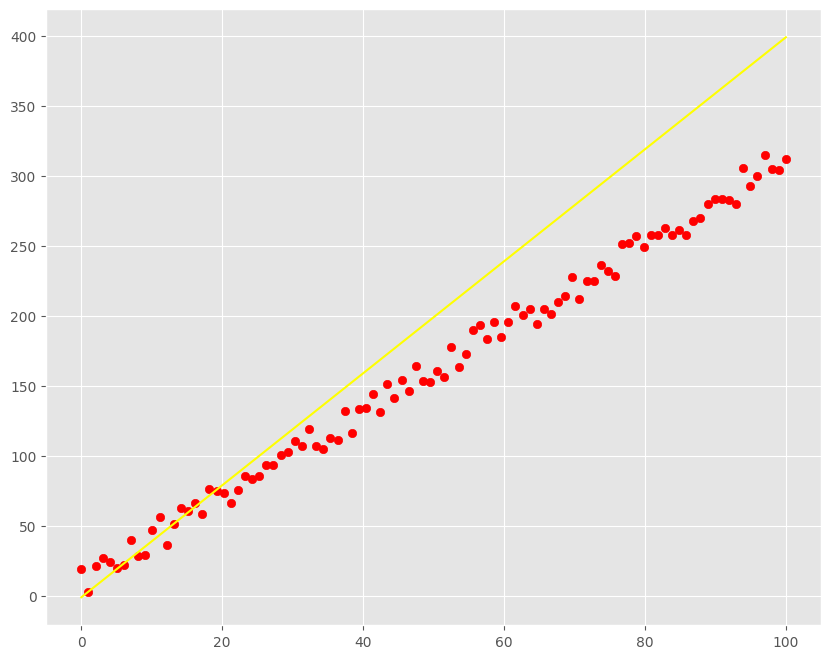

Average distance: 39.58878787878789



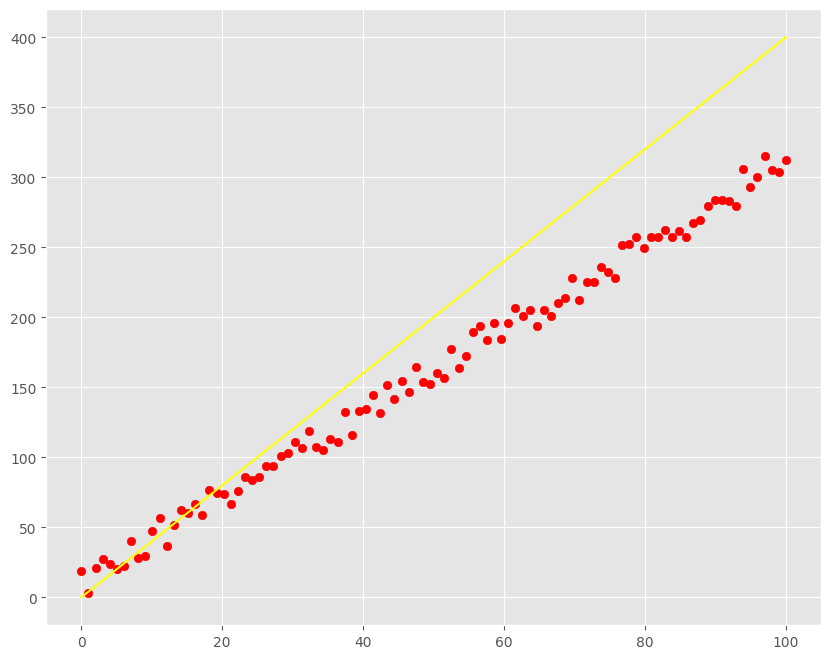

Average distance: 40.35282828282829



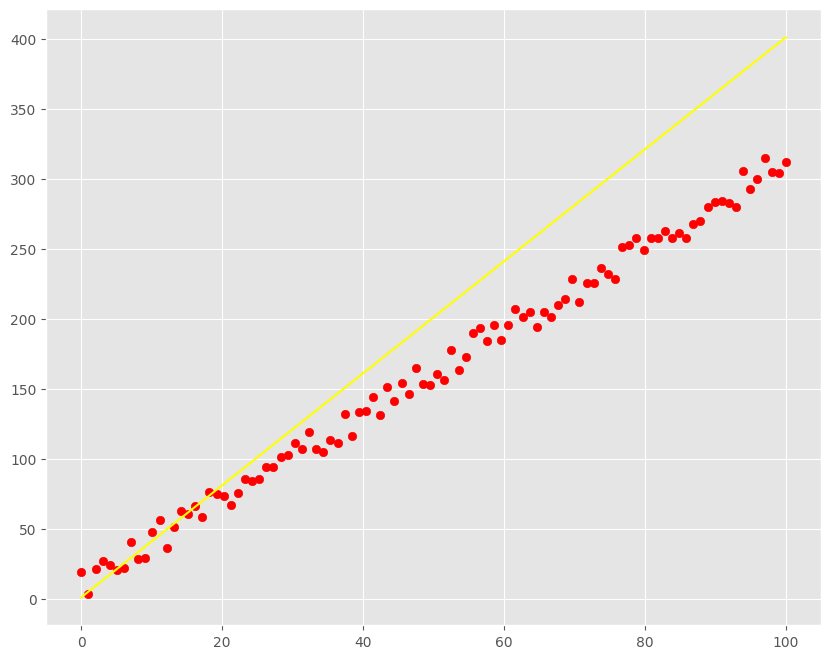

Average distance: 41.15282828282829



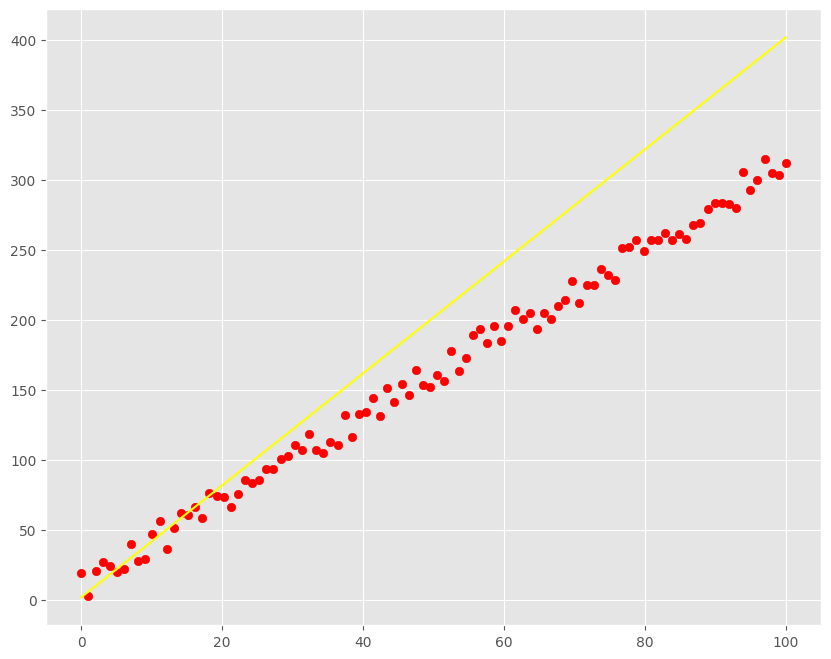

Average distance: 41.95606060606061



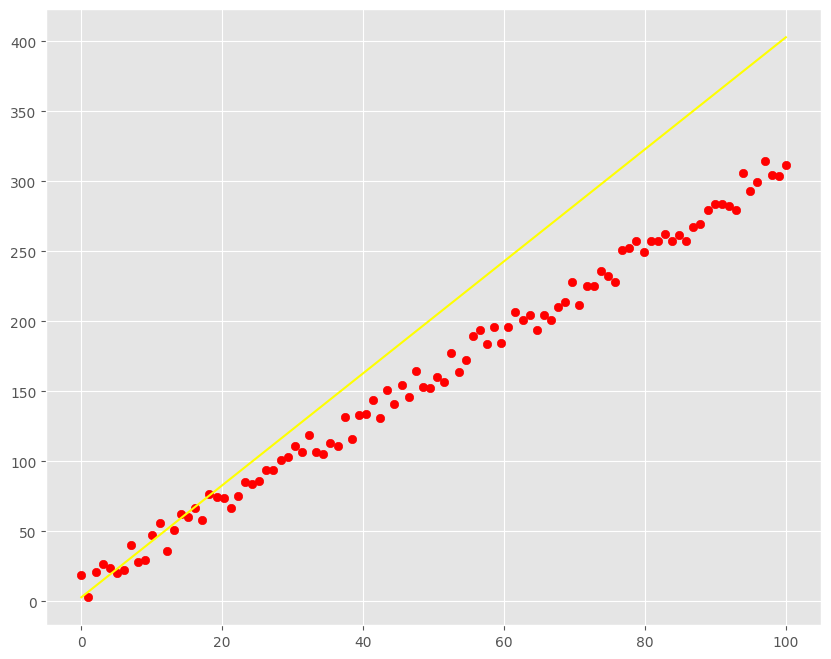

Average distance: 42.77606060606061



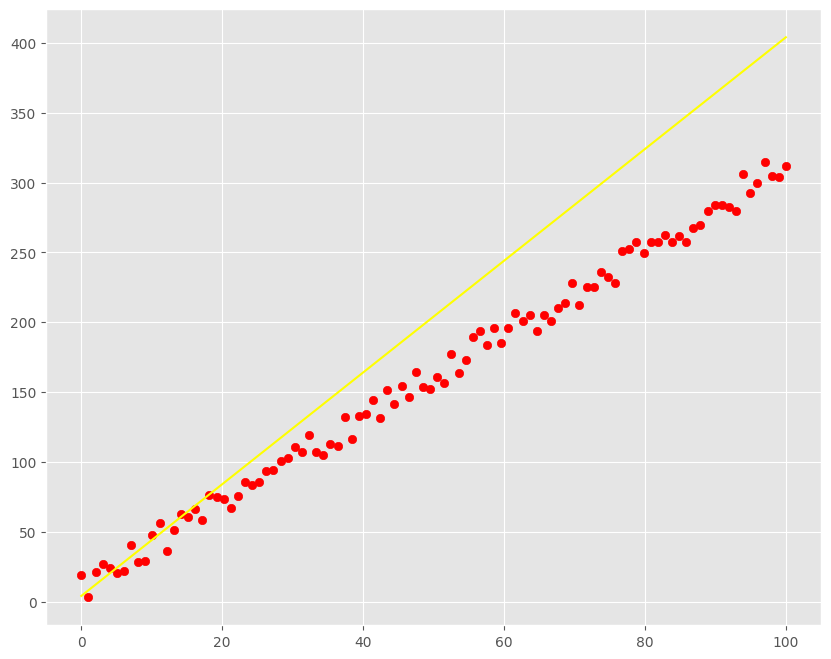

Average distance: 43.59969696969698



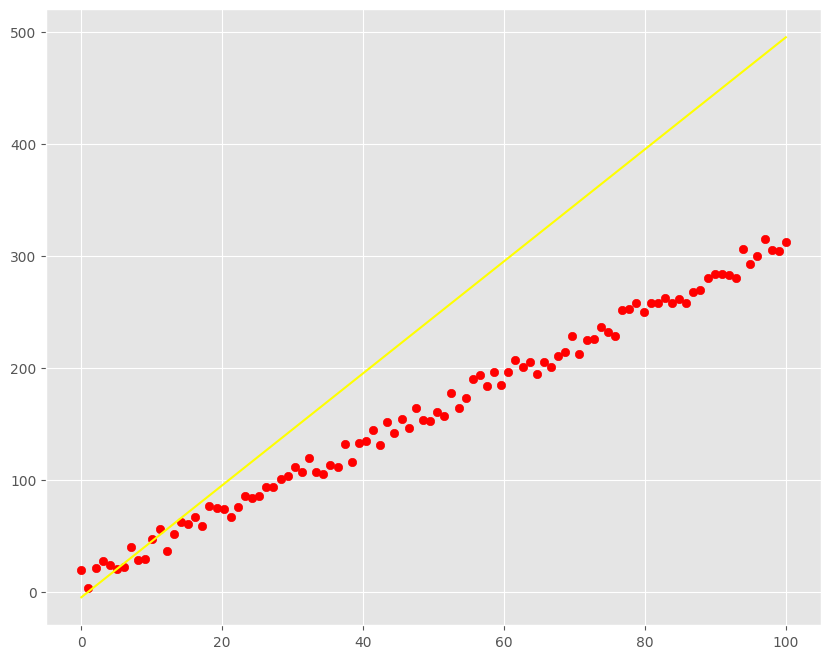

Average distance: 85.13464646464648



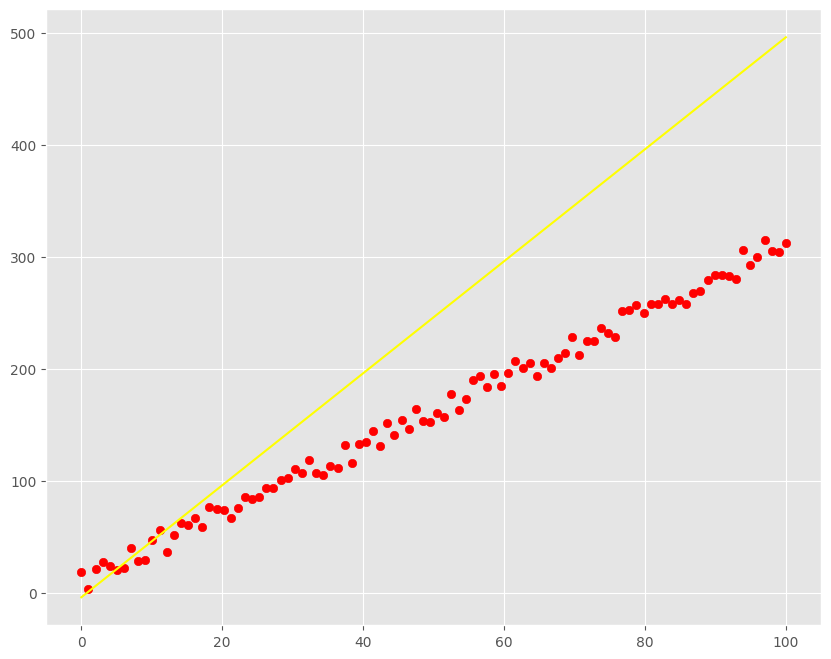

Average distance: 85.97464646464648



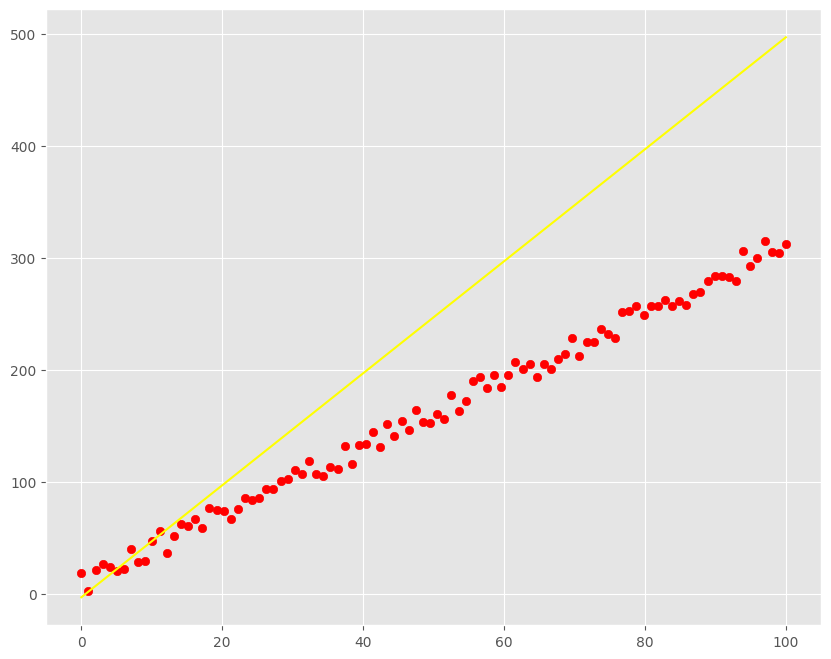

Average distance: 86.8186868686869



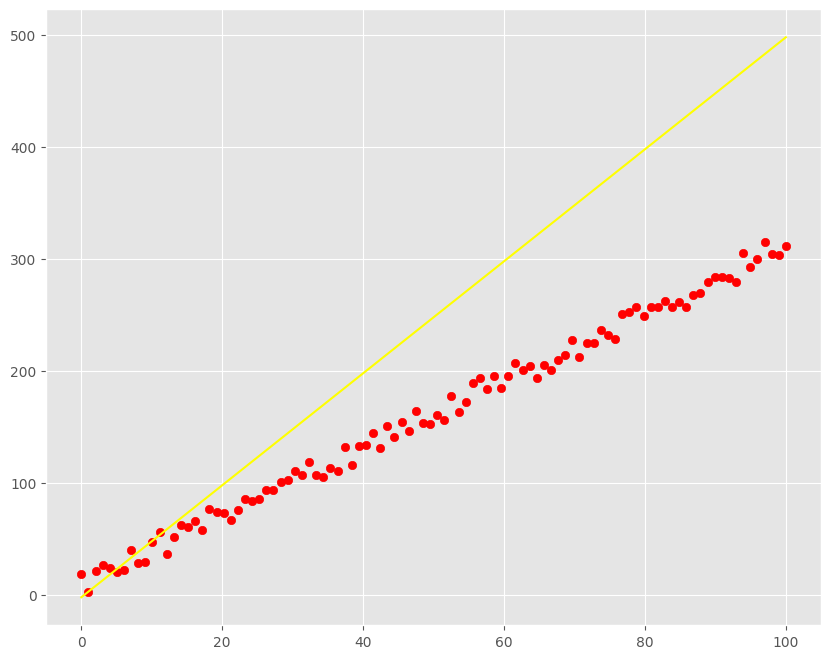

Average distance: 87.67909090909093



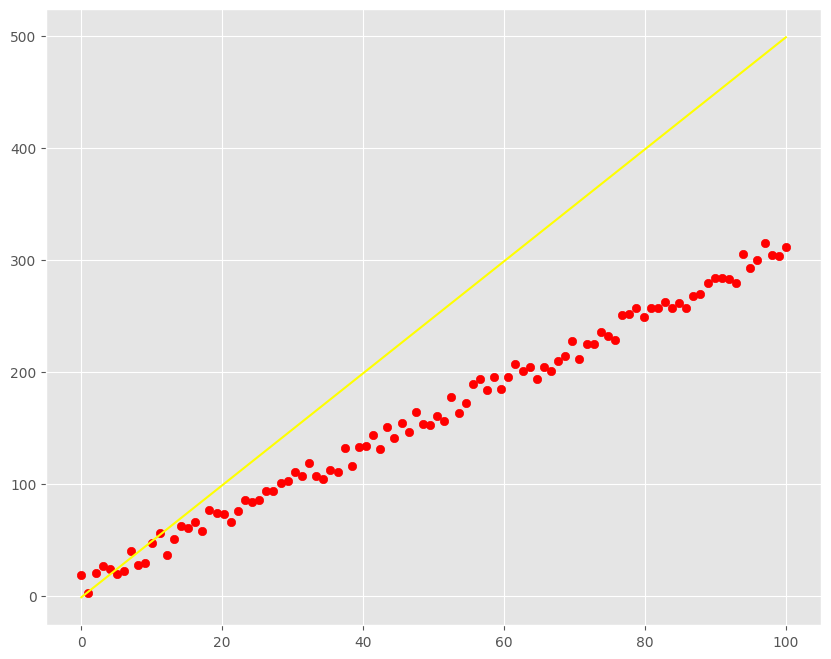

Average distance: 88.55909090909094



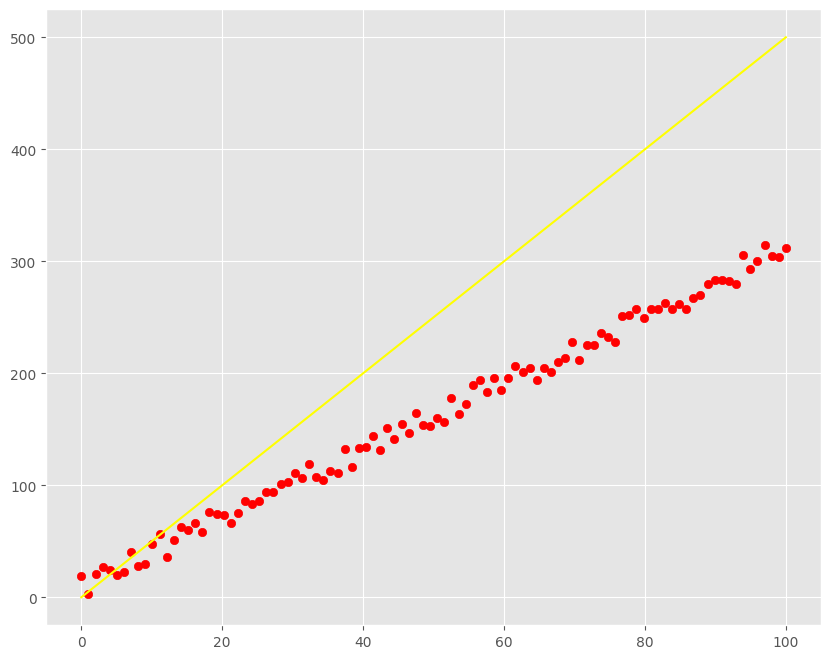

Average distance: 89.43909090909092



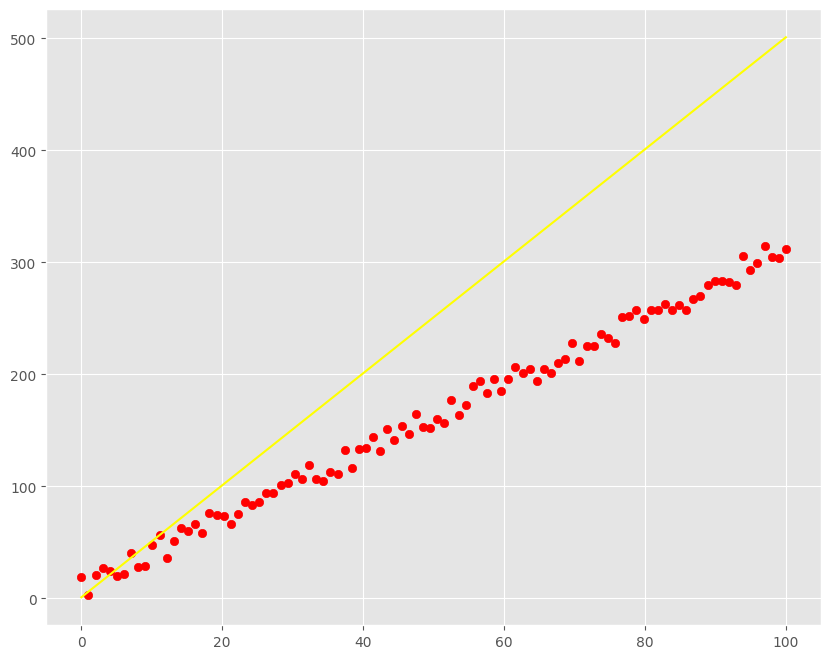

Average distance: 90.32353535353538



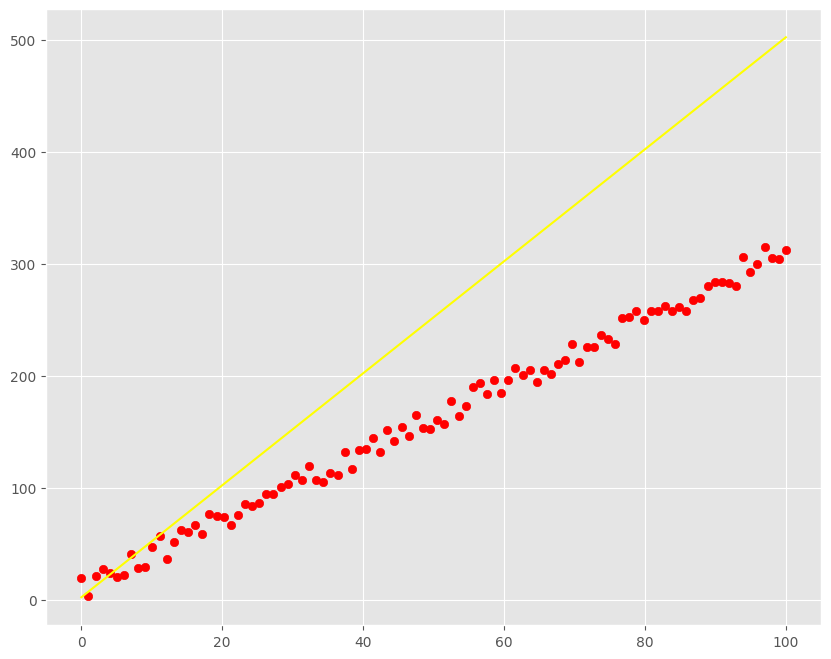

Average distance: 91.22353535353537



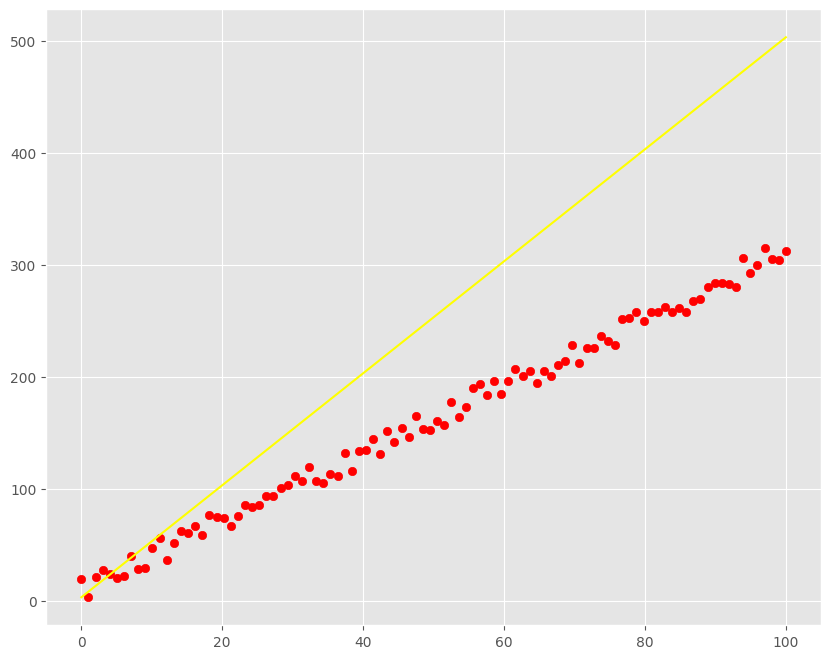

Average distance: 92.12353535353537



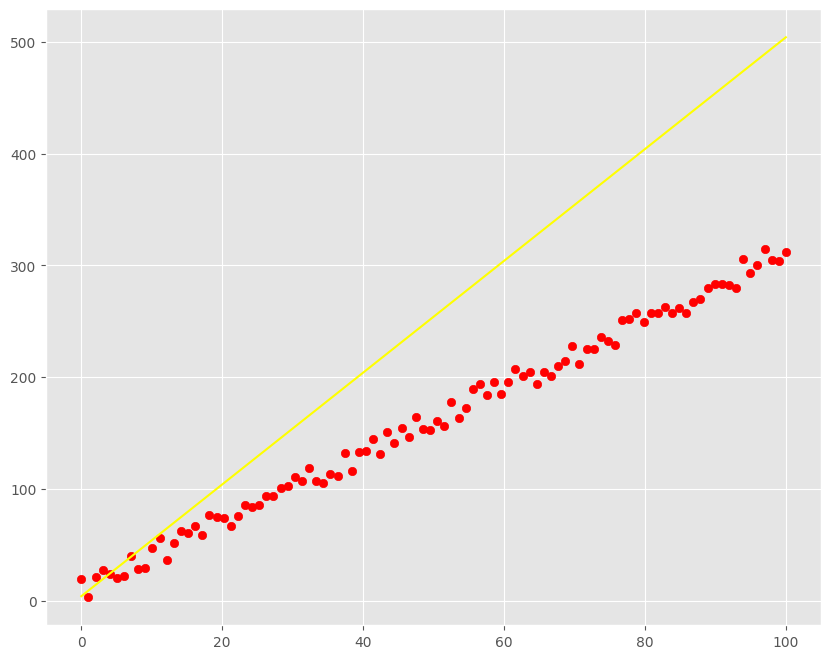

Average distance: 93.02515151515152



In [9]:
# brute-force solution of rotating line and searching through space of lines for best fit

for m in range(-2,6):
  for c in range(-5,5):
    py = (m*x + c).reshape((-1,1))

    plt.plot(x,py,color="yellow")
    plt.scatter(x,y,color="red")
    plt.show()

    print("Average distance: {}\n".format(np.mean(np.sqrt((y-py)**2))))

In [4]:
def lin_regression(x,y):

  # learning the coefficient and intercept

  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

  m1 = linear_model.LinearRegression()
  m1.fit(x_train,y_train)

  print("The coefficient is: {} and the intercept is: {}\n".format(m1.coef_[0][0],m1.intercept_[0]))

  y_pred = m1.predict(x_test)
  metrics.mean_squared_error(y_pred,y_test)

  # plotting data and predictions

  plt.title("Visualization of actual data vs predicted outputs")
  plt.scatter(x,y,color="blue")
  plt.plot(x_test,y_pred,color="red")
  plt.legend(["predicted line","actual data points"])
  plt.show()

  print("The RMSE for linear regression is: {}".format(math.sqrt(metrics.mean_squared_error(y_pred,y_test))))

  # plot training line and test points

The coefficient is: 2.9953957872022334 and the intercept is: 12.534571879892269



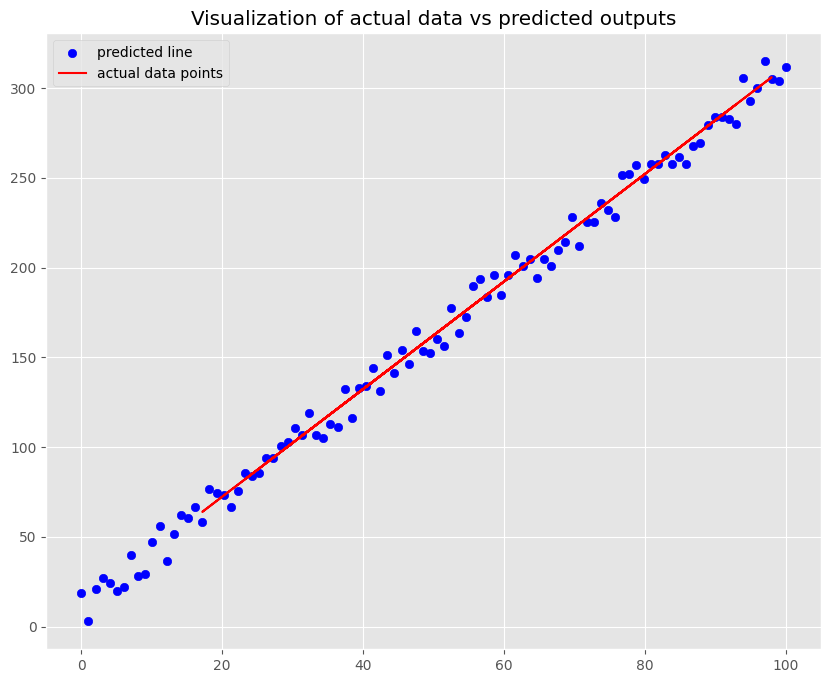

The RMSE for linear regression is: 6.959479191741117


In [5]:
lin_regression(x,y)

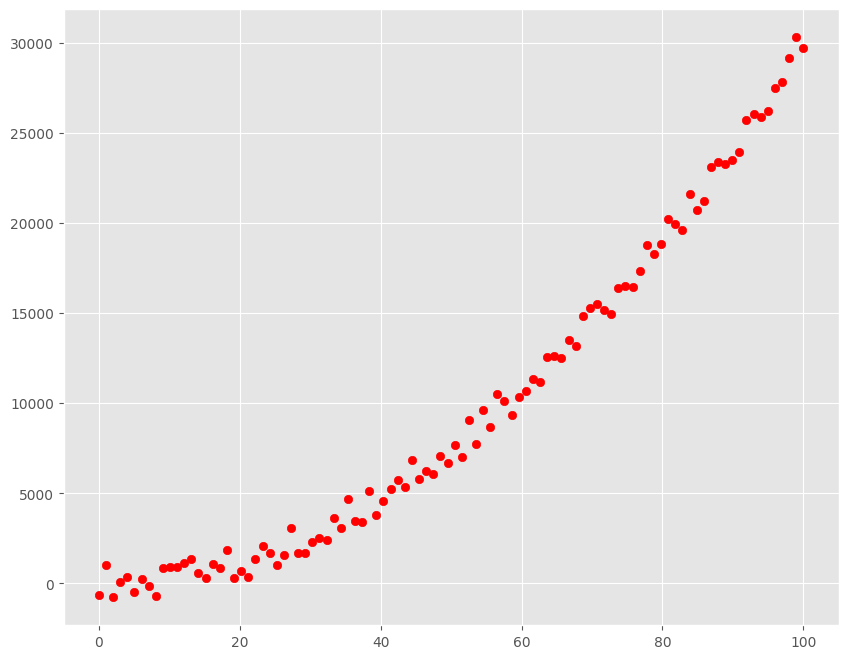

In [8]:
# simple polynomial with noise

y2 = (np.random.randint(-1000,1000,x.shape)).astype(int).reshape((-1,1)) + 3*x**2
plt.scatter(x,y2,color="red")
plt.show()

In [10]:
# POLYNOMIAL REGRESSION

def poly_regression(x,y,deg):

  x = x.reshape((-1,1))
  y = y.reshape((-1,1))

  poly = PolynomialFeatures(degree=deg)

  x_ = poly.fit_transform(x)
  poly.fit(x_,y)

  m1 = linear_model.LinearRegression()
  m1.fit(x_,y)
  y_pred = m1.predict(x_)

  mse = np.sqrt(metrics.mean_squared_error(y_pred,y))

  plt.plot(x,y_pred,color="red")
  plt.title("Visualization of actual data vs predicted outputs (polynomial regression)")
  plt.scatter(x,y,color="blue")
  plt.legend(["predicted polynomial","actual data points"])
  plt.show()

  print("The RMSE for polynomial regression is: {}".format(mse))

The coefficient is: 295.19054351226373 and the intercept is: -4791.985882289255



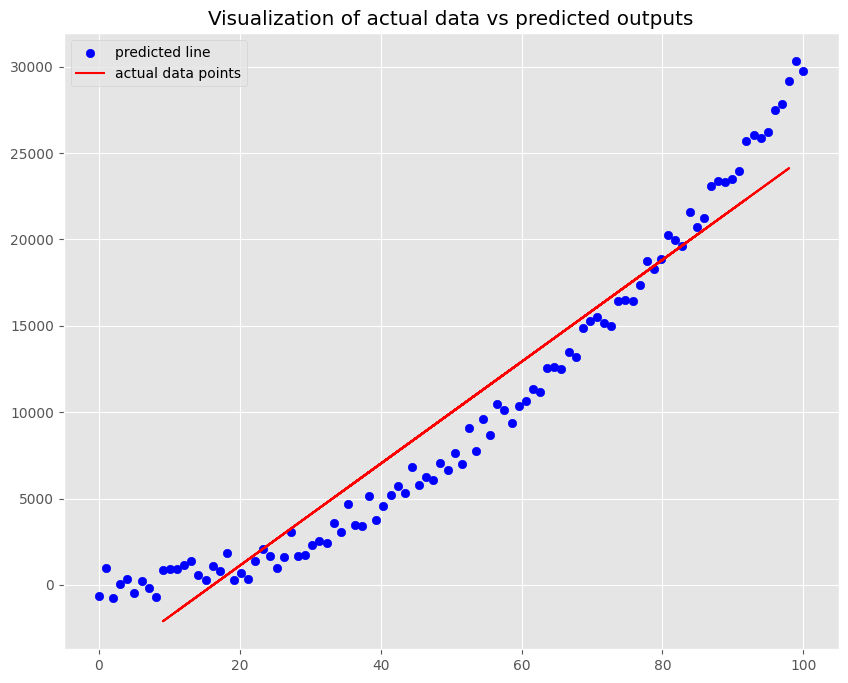

The RMSE for linear regression is: 2281.422505611765


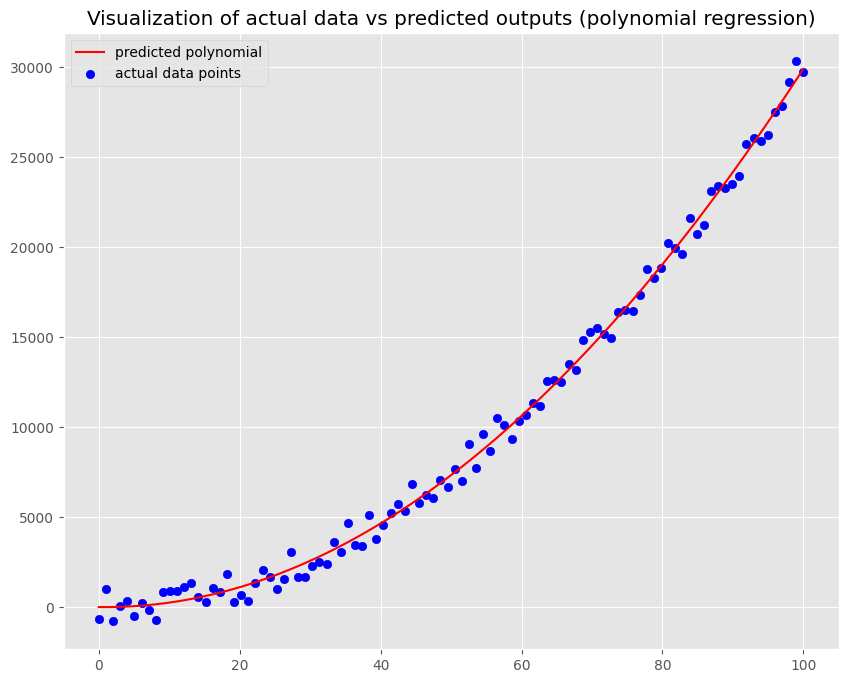

The RMSE for polynomial regression is: 578.4921275321941


In [11]:
lin_regression(x,y2)

poly_regression(x,y2,2)

In [12]:
df = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")
df['MEDV'] = df['median_house_value']
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,MEDV
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,342200.0


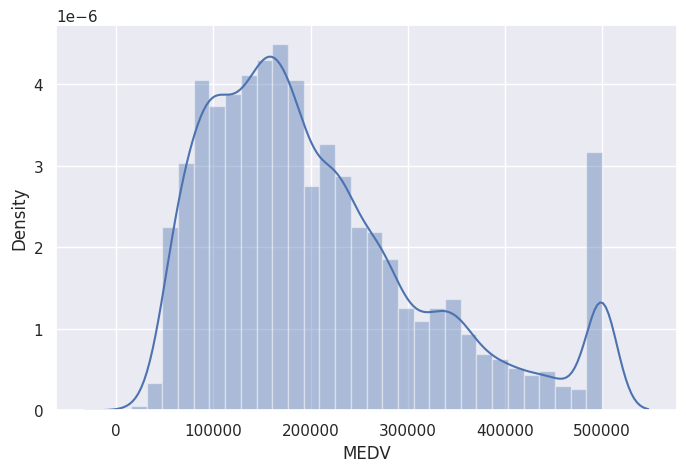

In [14]:
sns.set(rc={'figure.figsize':(8,5)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

In [15]:
df.drop(['ocean_proximity'],inplace=True,axis=1)

<Axes: >

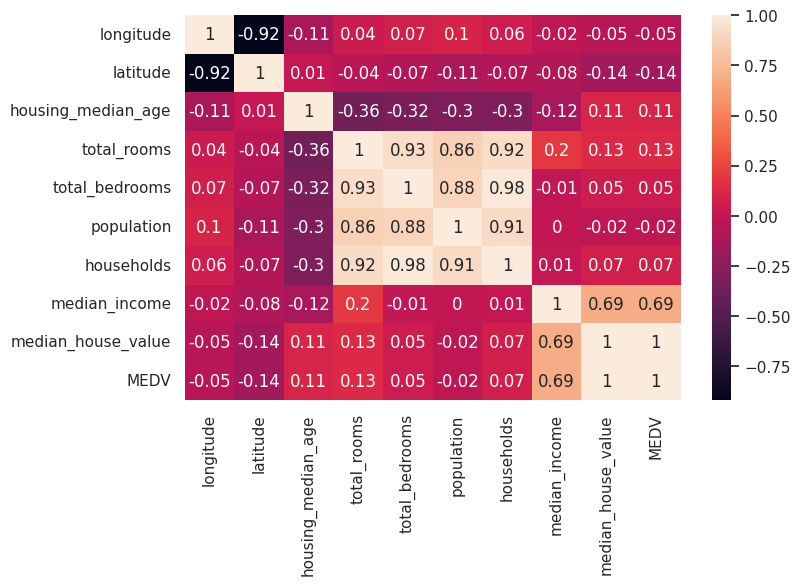

In [16]:
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

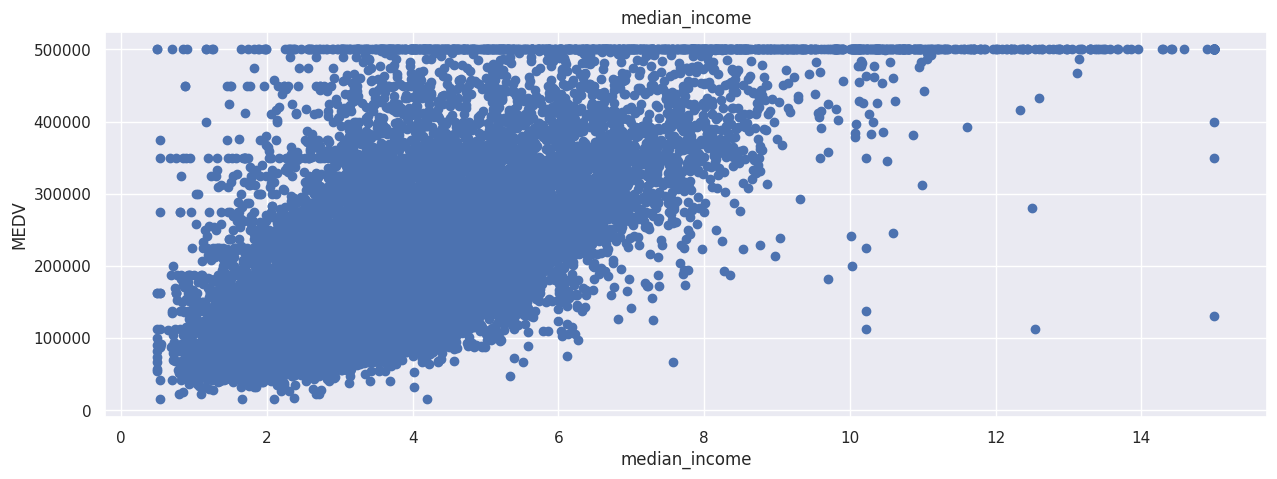

In [17]:
plt.figure(figsize=(15, 5))

features = ['median_income']
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    house_features = df[col]
    target_price = target
    plt.scatter(house_features, target_price, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [18]:
x_ex = pd.DataFrame(np.c_[df['median_income']], columns = ['median_income'])
y_ex = df['MEDV']

x_ex_train, x_ex_test, y_ex_train, y_ex_test = train_test_split(x_ex, y_ex, test_size = 0.2, random_state=42)

lin_model = linear_model.LinearRegression()
lin_model.fit(x_ex_train, y_ex_train)

LinearRegression()

In [19]:
y_ex_train_predict = lin_model.predict(x_ex_train)
rmse = (np.sqrt(metrics.mean_squared_error(y_ex_train, y_ex_train_predict)))
r2 = metrics.r2_score(y_ex_train, y_ex_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}\n'.format(rmse))

y_ex_test_predict = lin_model.predict(x_ex_test)
rmse = (np.sqrt(metrics.mean_squared_error(y_ex_test, y_ex_test_predict)))
r2 = metrics.r2_score(y_ex_test, y_ex_test_predict)

print("Model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))

The model performance for training set
--------------------------------------
RMSE is 83614.87409655548

Model performance for testing set
--------------------------------------
RMSE is 84209.01241414454


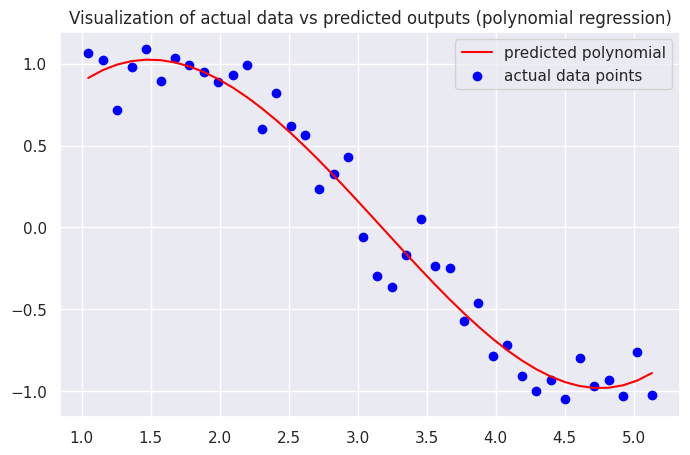

The RMSE for polynomial regression is: 0.14347377212689044


In [20]:
deg = 4#@param {type:"slider", min: 2, max:15, step:1}

np.random.seed(10)

x_ex = np.array([i*np.pi/180 for i in range(60,300,6)])
y_ex = np.sin(x_ex) + np.random.normal(0,0.15,len(x_ex))
poly_regression(x_ex,y_ex,deg)

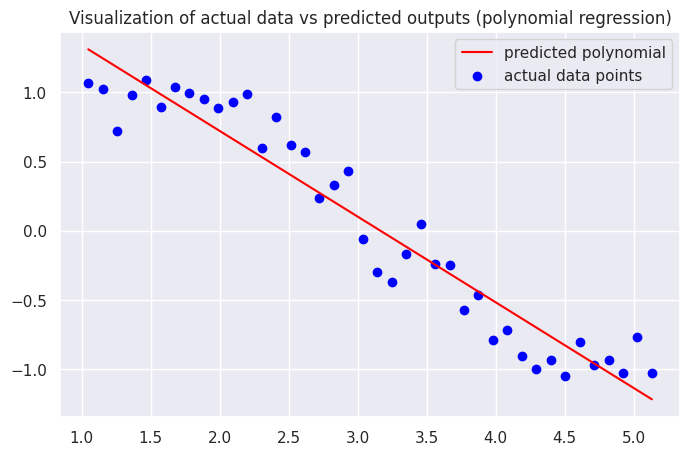

The RMSE for polynomial regression is: 0.21526437026076664


In [21]:
deg = 1
np.random.seed(10)

x_ex = np.array([i*np.pi/180 for i in range(60,300,6)])
y_ex = np.sin(x_ex) + np.random.normal(0,0.15,len(x_ex))
poly_regression(x_ex,y_ex,deg)

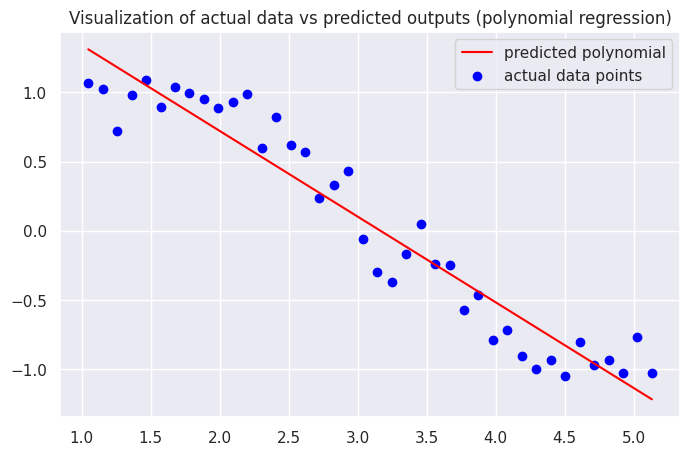

The RMSE for polynomial regression is: 0.21526437026076664


In [22]:
deg = 1
np.random.seed(10)

x_ex = np.array([i*np.pi/180 for i in range(60,300,6)])
y_ex = np.sin(x_ex) + np.random.normal(0,0.15,len(x_ex))
poly_regression(x_ex,y_ex,deg)